**Forecasting Stock Prices Using Time Series, Machine Learning, and Deep Learning Models**

*Introduction*

Forecasting stock prices is an increasingly critical and challenging task in financial markets due to the inherent volatility and complex dynamics of stock data. Accurate predictions enable investors, analysts, and policymakers to make informed decisions, minimizing risks and maximizing returns. The unpredictability of financial markets, compounded by various macroeconomic and geopolitical factors, makes forecasting stock prices both a science and an art. Traditional approaches such as the Autoregressive Integrated Moving Average (ARIMA) have long been the foundation of time series forecasting, providing robust predictions in stationary and linear contexts. However, the limitations of these methods in capturing non-linear and non-stationary patterns have driven a shift towards advanced machine learning and deep learning techniques, which are better suited to handle complex, high-dimensional datasets (Chatterjee et al., 2021; Yamak et al., 2019; Siami-Namini et al., 2019).

Modern methods like Long Short-Term Memory (LSTM) networks and Bidirectional LSTM (BiLSTM) have demonstrated superior capabilities in modelling long-term dependencies and non-linear patterns in financial data (Lawi et al., 2022). These architectures excel in recognizing temporal dependencies, making them highly effective for sequential data analysis. Additionally, models like Prophet, N-BEATS, and DeepAR have introduced innovations tailored for financial forecasting, leveraging probabilistic modelling, neural architectures, and attention mechanisms to enhance predictive accuracy (Salinas et al., 2020; Oreshkin et al., 2019; Taylor and Letham, 2018). Emerging techniques such as Temporal Convolutional Networks (TCN) and hybrid architectures combining GRU and attention mechanisms also offer promising alternatives, improving both efficiency and accuracy in processing large-scale data (Chen et al., 2024).

This study focuses on the forecasting of stock prices for ten leading companies: Microsoft Corp., Nvidia Corp., Alphabet Inc., Amazon.com Inc., Meta Platforms Inc., Taiwan Semiconductor Manufacturing Co. Ltd., ASML Holding NV, Adobe Inc., IBM, and Arista Networks Inc. These companies represent a significant portion of the technological and innovation-driven economy, often serving as indicators of broader market trends. Using data collected via the Yahoo Finance API, this research employs various forecasting models, including ARIMA, LSTM, BiLSTM, N-BEATS, Prophet, DeepAR, and TCN. Each model's effectiveness will be rigorously compared to identify the most suitable approach for stock price prediction (Pant et al., 2024).

Objectives

The objectives of this project are as follows:

- To evaluate and compare the performance of multiple time series forecasting models, including traditional, machine learning, and deep learning approaches, in predicting stock prices.

- To identify the most suitable forecasting model for predicting stock prices of the selected companies based on accuracy, robustness, and computational efficiency.

*Who Will Benifit*

The findings of this project will benefit the following stakeholders:

- Investors: By providing accurate predictions, investors can make more informed decisions about buying, holding, or selling stocks, thereby minimizing risks and maximizing returns. This project will also help retail investors understand the application of advanced predictive models.

- Financial Analysts: The study will offer a comparative analysis of forecasting models, helping analysts understand the strengths and limitations of different approaches, thereby enhancing their analytical toolkits.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


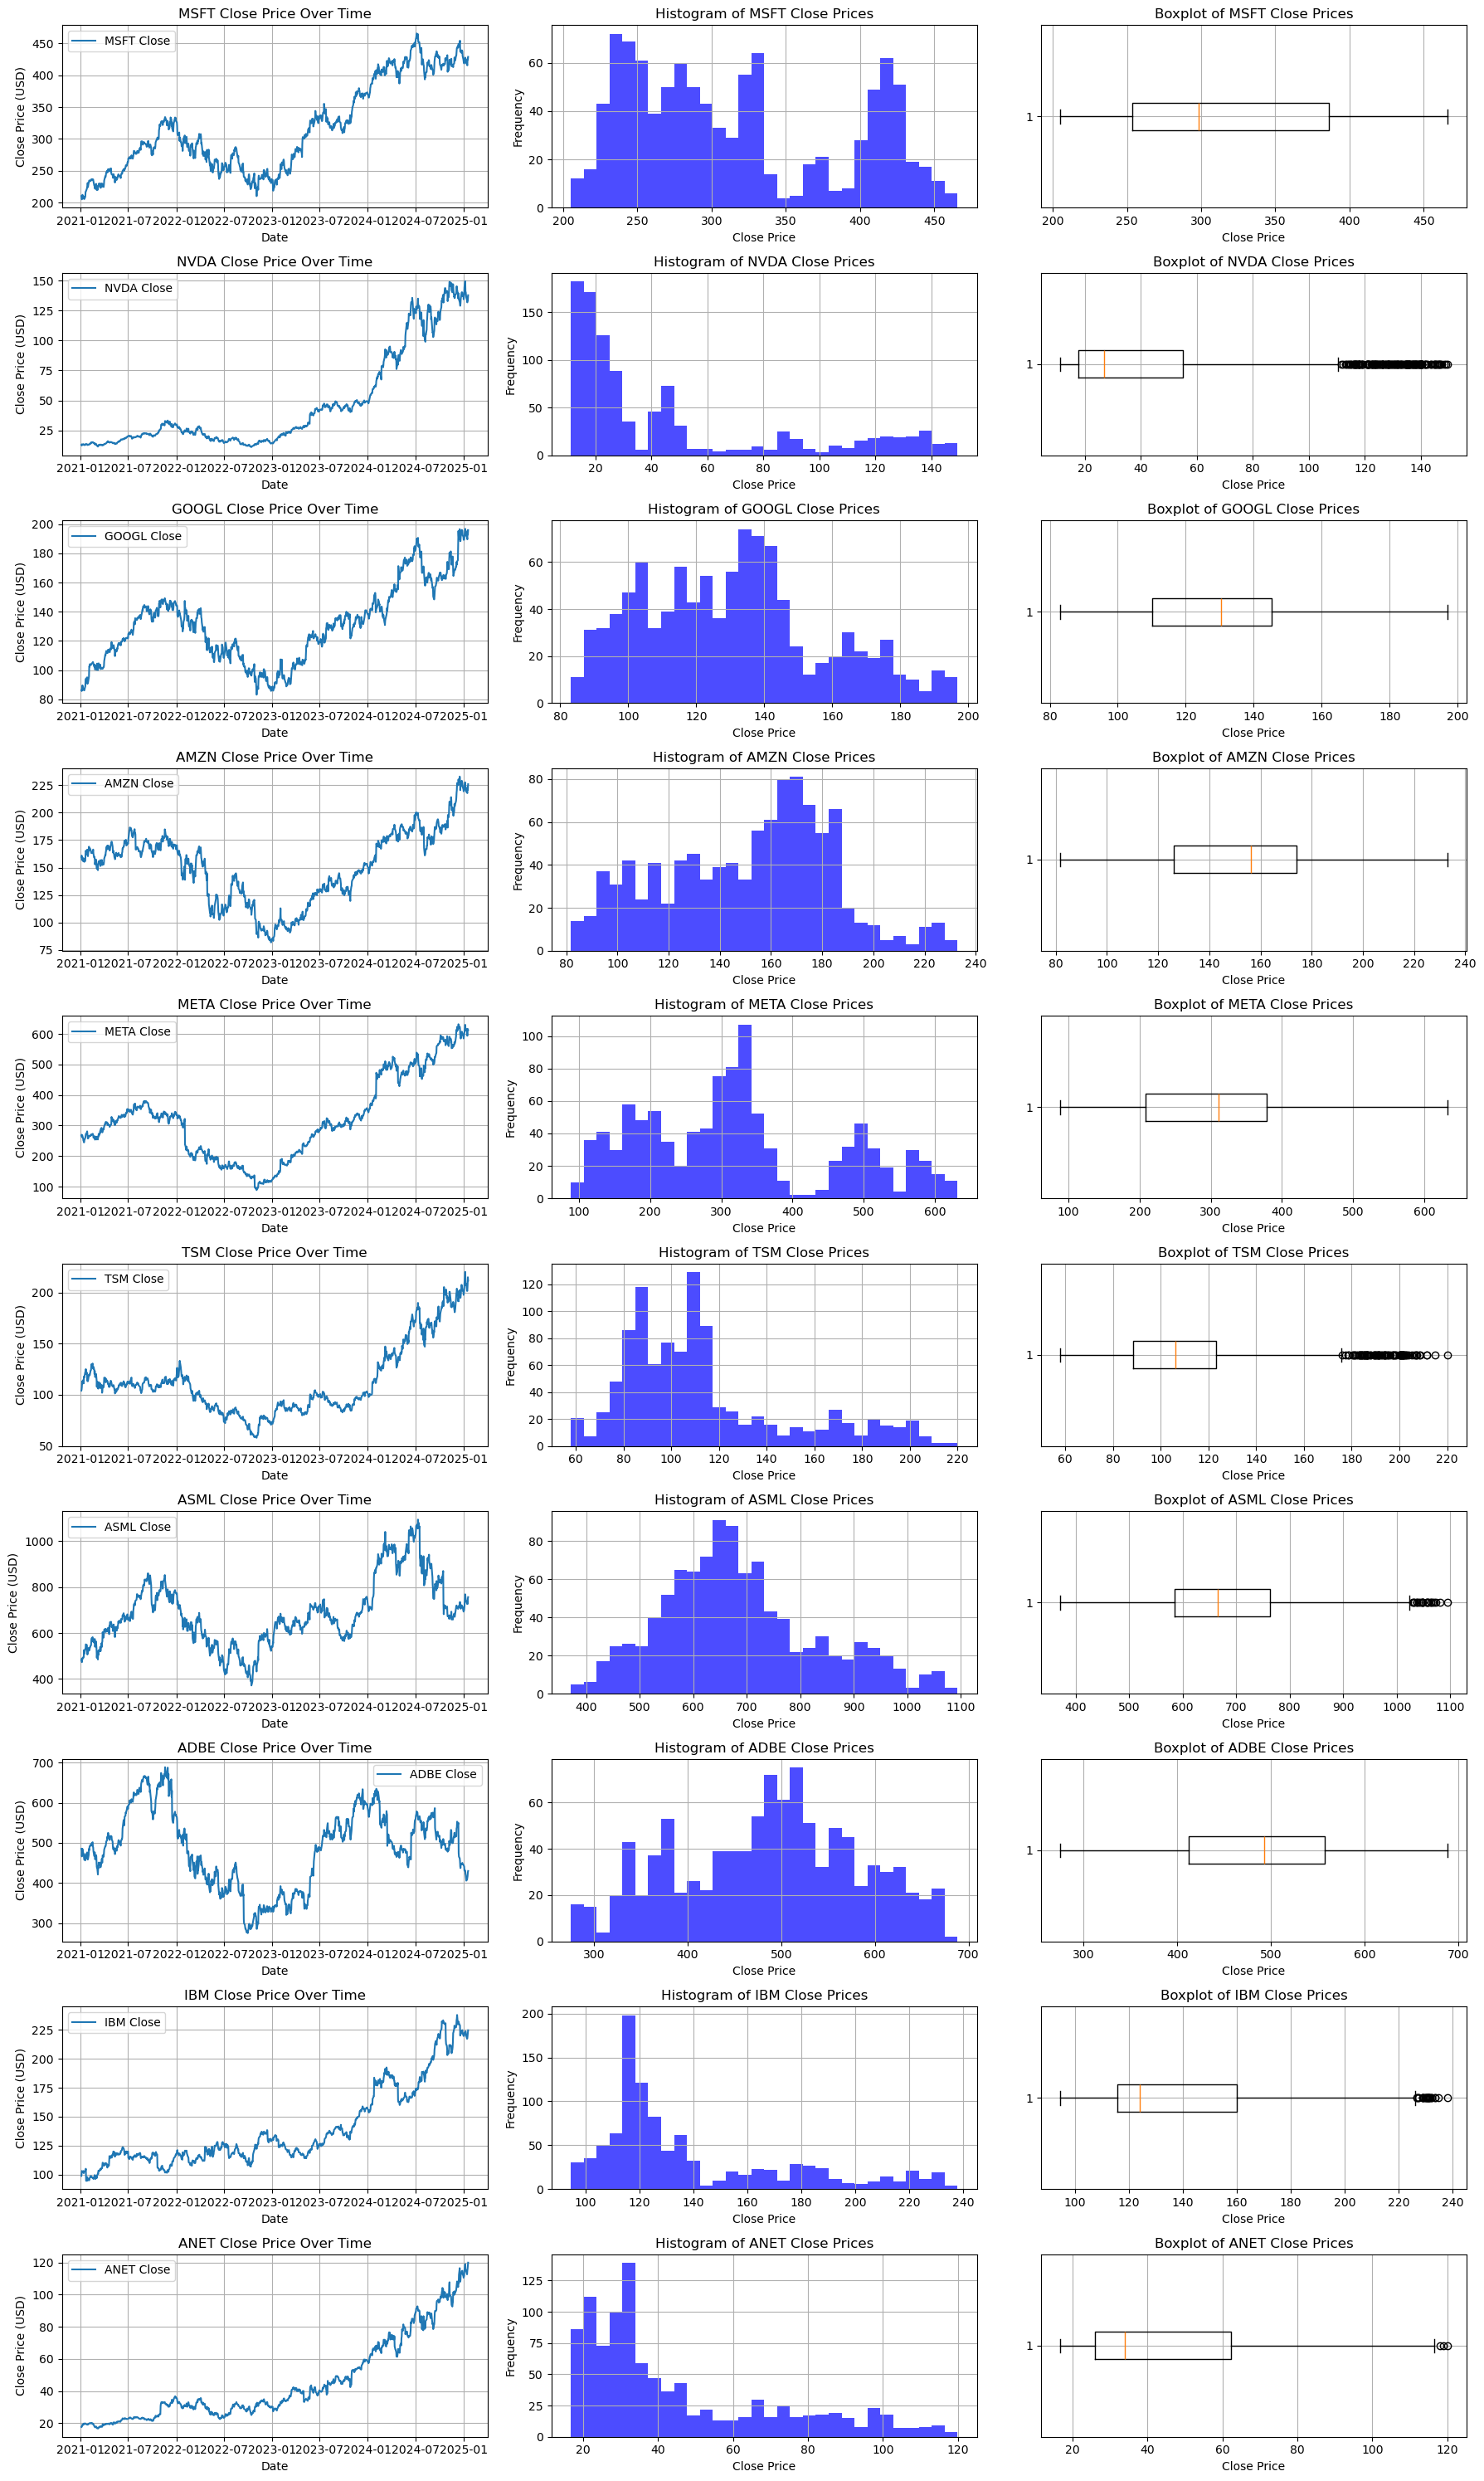

Summary statistics for all tickers:
Ticker         MSFT         NVDA        GOOGL         AMZN         META  \
count   1016.000000  1016.000000  1016.000000  1016.000000  1016.000000   
mean     316.317837    46.645093   130.697540   150.683590   320.469323   
std       70.638368    40.564699    26.311657    33.004210   135.992043   
min      205.164673    11.215972    83.128654    81.820000    88.571663   
25%      253.580051    17.737530   110.044327   125.980003   208.324226   
50%      298.590454    26.753589   130.442139   156.336250   310.598541   
75%      385.834785    55.114124   145.243862   174.132748   378.255089   
max      465.786438   149.429993   196.869995   232.929993   632.170044   

Ticker          TSM         ASML         ADBE          IBM         ANET  
count   1016.000000  1016.000000  1016.000000  1016.000000  1016.000000  
mean     113.216847   685.942399   486.227500   139.148421    45.421213  
std       34.740380   144.831401    96.270061    35.198033    25.8

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# tickers
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = '2021-01-01'

def download_data(tickers, start):
    all_data = {}
    data = pd.DataFrame()
    for ticker in tickers:
        #print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data=pd.concat([data,df['Close']],axis=1)
    return data


data_df = download_data(tickers, start_date)

# storing the data in a csv file
#data_df.to_csv('data.csv')


fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(18, 30))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    # Line plot
    axes[i*3].plot(data_df.index, data_df[ticker], label=f"{ticker} Close")
    axes[i*3].set_title(f"{ticker} Close Price Over Time")
    axes[i*3].set_xlabel("Date")
    axes[i*3].set_ylabel("Close Price (USD)")
    axes[i*3].legend()
    axes[i*3].grid()

    # histogram
    axes[i*3+1].hist(data_df[ticker].dropna(), bins=30, color='blue', alpha=0.7)
    axes[i*3+1].set_title(f"Histogram of {ticker} Close Prices")
    axes[i*3+1].set_xlabel("Close Price")
    axes[i*3+1].set_ylabel("Frequency")
    axes[i*3+1].grid()

    # boxplot
    axes[i*3+2].boxplot(data_df[ticker].dropna(), vert=False)
    axes[i*3+2].set_title(f"Boxplot of {ticker} Close Prices")
    axes[i*3+2].set_xlabel("Close Price")
    axes[i*3+2].grid()


plt.tight_layout()
plt.show()

print("Summary statistics for all tickers:")
print(data_df.describe())

In [ ]:
#missing values
data_df.isnull().sum()

Ticker
MSFT     0
NVDA     0
GOOGL    0
AMZN     0
META     0
TSM      0
ASML     0
ADBE     0
IBM      0
ANET     0
dtype: int64

The data contains no missing values.

<Axes: xlabel='Date'>

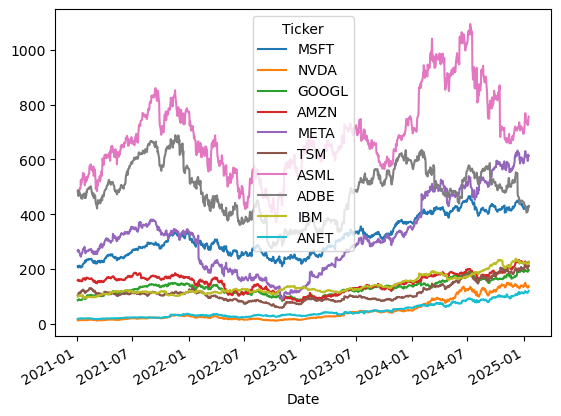

In [ ]:
data_df.plot()

In the plot above we can see that almost all the companies suffer from a decline in their stock price inaround 2022 which could be due to COVID. A suggestion could be that the models and analysis is beeter to start after the COVID decline.

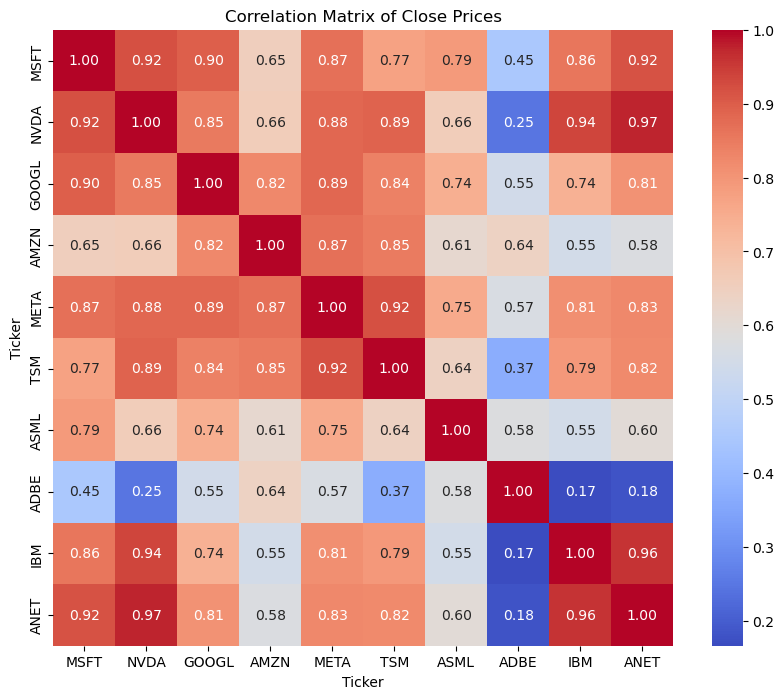

Ticker      MSFT      NVDA     GOOGL      AMZN      META       TSM      ASML  \
Ticker                                                                         
MSFT    1.000000  0.918929  0.897373  0.653237  0.869110  0.773867  0.791109   
NVDA    0.918929  1.000000  0.851463  0.661160  0.883352  0.891981  0.659565   
GOOGL   0.897373  0.851463  1.000000  0.824216  0.885852  0.838111  0.742829   
AMZN    0.653237  0.661160  0.824216  1.000000  0.868971  0.848767  0.613155   
META    0.869110  0.883352  0.885852  0.868971  1.000000  0.919736  0.754827   
TSM     0.773867  0.891981  0.838111  0.848767  0.919736  1.000000  0.641978   
ASML    0.791109  0.659565  0.742829  0.613155  0.754827  0.641978  1.000000   
ADBE    0.446932  0.246893  0.545754  0.639222  0.569624  0.371170  0.579220   
IBM     0.856755  0.936327  0.737984  0.547776  0.811139  0.792490  0.548544   
ANET    0.915541  0.974511  0.807671  0.576311  0.826055  0.822653  0.598513   

Ticker      ADBE       IBM      ANET  


In [ ]:
correlation_matrix = data_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Close Prices")
plt.show()
print(correlation_matrix)

The stock prices are highly correlated to each other.

**Chapter 3: Literature Review**

Forecasting stock prices has evolved significantly, driven by the need to address the complexities and volatility of financial markets. Traditional methods like the Autoregressive Integrated Moving Average (ARIMA) have been foundational for modeling linear time series patterns, but their limitations in handling non-linearity and non-stationarity have prompted a shift toward machine learning (ML) and deep learning (DL) approaches. This review provides a comprehensive synthesis of existing literature, highlighting key advancements, limitations, and lessons relevant to forecasting stock prices for leading technology companies such as Microsoft, Nvidia, Alphabet, and others.

*Focused Literature Review Relevant to the Research Questions*

This research aims to evaluate the performance of traditional, ML, and DL models in financial forecasting, addressing their effectiveness, limitations, and suitability for predicting stock prices.

*Traditional Statistical Models*

ARIMA has been extensively used for financial forecasting due to its simplicity and effectiveness in linear, stationary data scenarios (Siami-Namini et al., 2019)A Comparative Analysis …. Seasonal ARIMA (SARIMA) variants incorporate seasonality to enhance predictive power (Chen et al., 2024)An improved deep tempor…. However, these models often fail to capture the non-linear, chaotic dynamics of stock prices, making them less suitable for long-term or complex forecasting.

*Machine Learning Approaches*

ML techniques like Support Vector Machines (SVMs), Random Forest (RF), and eXtreme Gradient Boosting (XGBoost) offer flexibility in modeling non-linear relationships (Lawi et al., 2022; Chauhan et al., 2021)Implementation of Long …Indian Stock Market Pre…. Hybrid methods, such as ARIMA-LS-SVM, achieve improved accuracy by integrating statistical and ML models. However, their reliance on feature engineering, sequential dependency limitations, and high computational costs constrain their utility in time series forecasting.

*Deep Learning Models*
DL approaches have revolutionized financial forecasting with their ability to handle high-dimensional, sequential data. Recurrent Neural Networks (RNNs) and their advanced variants, Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU), excel in capturing temporal dependencies and non-linear patterns (Chen et al., 2024; Lawi et al., 2022)

•	*LSTM and GRU*: LSTMs are particularly effective for long-term dependencies, while GRUs, with fewer parameters, offer computational efficiency for resource-constrained environments (Yavasani and Wang, 2023; Chen et al., 2024)

•	*BiLSTM*: Bidirectional LSTM (BiLSTM) models improve accuracy by processing sequences in forward and backward directions, enabling better context understanding (Siami-Namini et al., 2019; Patel et al., 2020)A Comparative Analysis …Comparative Study of Pr….

*Emerging DL Models*

Innovative architectures such as N-BEATS, DeepAR, and Temporal Convolutional Networks (TCNs) have expanded the

*DL landscape*:

•	Prophet: Designed for ease of use, Prophet integrates domain knowledge for accurate predictions in business contexts (Taylor and Letham, 2018)forecasting at scale.

•	N-BEATS: This interpretable neural network excels in decomposing trend and seasonality, achieving state-of-the-art performance on benchmark datasets (Oreshkin et al., 2019).

•	DeepAR: A probabilistic model based on RNNs, DeepAR effectively handles large-scale time series datasets (Salinas et al., 2020).

•	TCNs: Temporal Convolutional Networks offer efficiency in capturing long-term dependencies, with faster training and greater stability than RNNs (Chen et al., 2024; Lea et al., 2017).

Limitations of Available Solutions and Approaches
While these advancements have pushed the boundaries of financial forecasting, each method has its limitations:

1.	Traditional Models:
-	Struggle with non-linear and non-stationary data prevalent in financial markets.

-	Limited scalability for high-dimensional and long-term forecasting tasks.

-	Dependence on data preprocessing to meet linearity and stationarity assumptions.

2.	*Machine Learning Models*:

-	Heavy reliance on feature engineering and domain expertise.

-	Inability to capture temporal dependencies effectively, particularly in longer sequences.

-	Computationally expensive tuning processes.

3.	*Deep Learning Models*:

-	Require large datasets and extensive computational resources.

-	High risk of overfitting with complex architectures.

-	Lack of interpretability can hinder trust in decision-making contexts.

4.	*Hybrid and Emerging Models*:

-	Hybrid approaches demand significant manual tuning, making them resource-intensive.

-	Probabilistic models like DeepAR depend on the availability of large-scale datasets.

**Summary of Lessons from the Literature**

1.	*Model Selection and Customization*:

-	DL models such as LSTM, GRU, and BiLSTM excel in capturing temporal dependencies and non-linearities.

-	Emerging architectures like N-BEATS and TCNs provide enhanced scalability and interpretability.

2.	*Data Challenges*:
-	Incorporating external factors like macroeconomic indicators and market sentiment improves predictive accuracy.

-	Robust preprocessing techniques (e.g., normalization and deseasonalization) are crucial for handling raw data.

3.	*Evaluation Metrics and Probabilistic Insights*:

-	While common metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE) measure accuracy, probabilistic forecasts (e.g., DeepAR) offer valuable insights into uncertainties.

4.	Ensemble and Hybrid Approaches:

-	Combining models or creating ensembles often yields better results than relying on single architectures.



**Data Source and Description**

The data utilized for this research was retrieved from Yahoo Finance, a widely recognized source for financial datasets. The dataset includes historical stock prices of ten leading technology companies: Microsoft Corp. (MSFT), Nvidia Corp. (NVDA), Alphabet Inc. (GOOGL), Amazon.com Inc. (AMZN), Meta Platforms Inc. (META), Taiwan Semiconductor Manufacturing Co. Ltd. (TSM), ASML Holding NV (ASML), Adobe Inc. (ADBE), International Business Machines Corp. (IBM), and Arista Networks Inc. (ANET).

Each dataset encompasses various financial attributes, such as:

-	Open: The stock's opening price for a given trading day.

-	High: The highest price of the stock for the trading day.

-	Low: The lowest price of the stock for the trading day.

-	Close: The stock's closing price.

-	Volume: The number of shares traded during the day.

-	Adj Close (adjusted closing price): Historical data adjusted for stock splits, dividends, and rights offerings.


However, the newer versions of Yahoo Finance’s API do not include an explicit "Adj Close" column. Therefore, we rely on the "Close" column as the primary variable for analysis and forecasting. This focus ensures uniformity and compatibility across all datasets.

4.2 *Classification of Variables*
The variables in the dataset can be classified into two categories:

1.	*Independent Variables*:
-	Volume

-	High

-	Low

-	Open


2.	Dependent Variable:

-	Close (used as the target for forecasting models)


This classification allows us to analyze how trading volume and price movements during the day influence the closing prices of the stocks.


4.3 *Data Import and Cleaning*

The data cleaning process ensures the integrity and usability of the dataset for analysis and modeling. Below are the steps undertaken:

1.	*Data Import*: Using the yfinance library in Python, historical stock data for the ten companies was downloaded programmatically. The code snippet below illustrates the data import process:




In [ ]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = ['MSFT', 'NVDA', 'GOOGL', 'AMZN', 'META', 'TSM', 'ASML', 'ADBE', 'IBM', 'ANET']
data = {}

# Download data for each ticker
for ticker in tickers:
    data[ticker] = yf.download(ticker, start='2021-01-01')

# Store data in a dictionary
stocks_df = {ticker: data[ticker][['Open', 'High', 'Low', 'Close', 'Volume']] for ticker in tickers}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Data Cleaning**

1.	*Handling Missing Values*:

-	Missing values were identified and filled using forward fill (propagating the last valid observation forward).

-	Stocks with extensive missing data were excluded or analyzed individually to ensure their absence did not bias results.


In [ ]:
for ticker in stocks_df:
    stocks_df[ticker].fillna(method='ffill', inplace=True)


2.	Outlier Detection and Treatment:

-	Boxplot Analysis: Outliers in the "Close" column were identified using boxplots. Stocks like NVDA displayed noticeable outliers.

-	Decision: Since the dataset represents time series data, removing outliers may disrupt trends. Instead, transformations (e.g., logarithmic scaling) were considered where necessary.


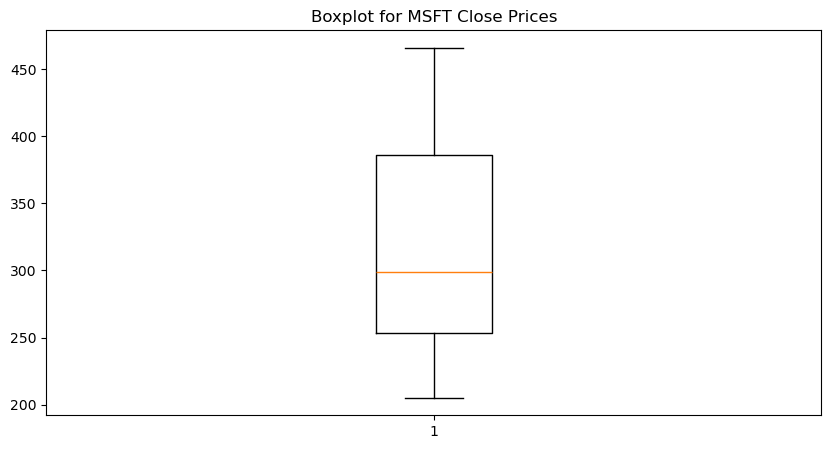

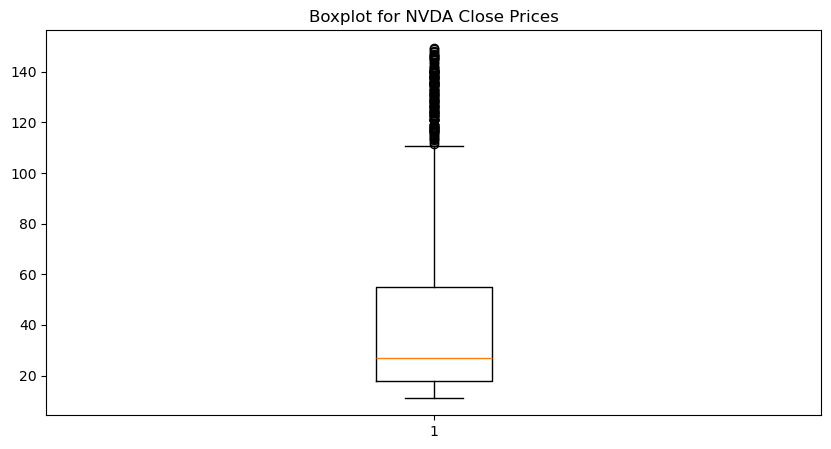

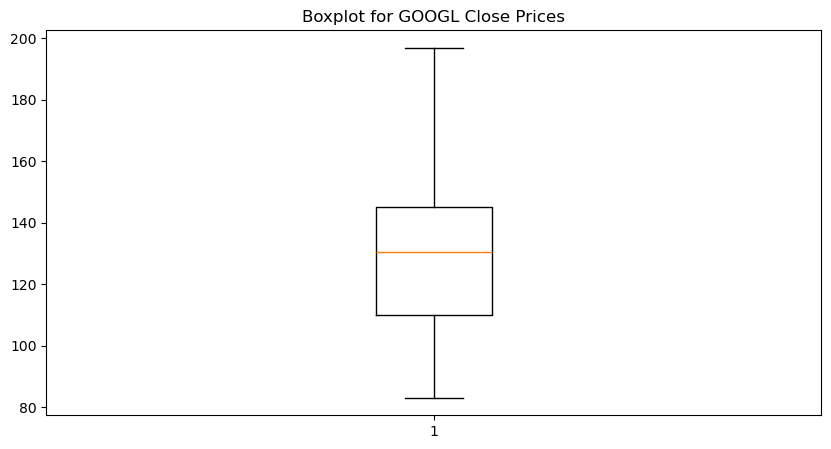

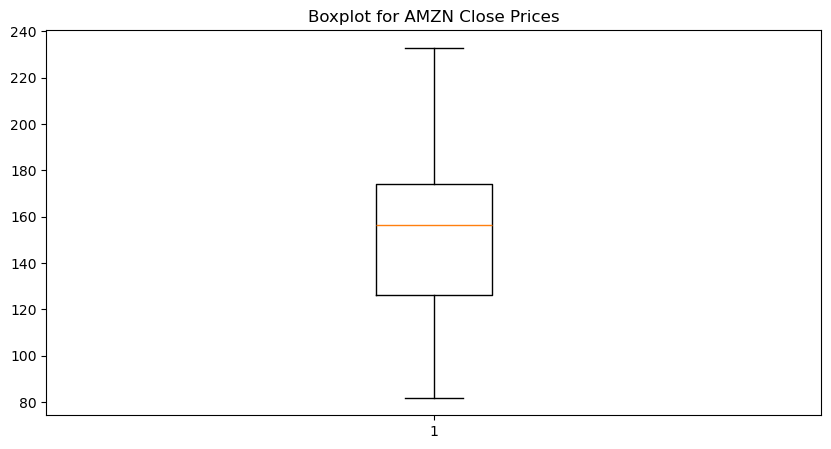

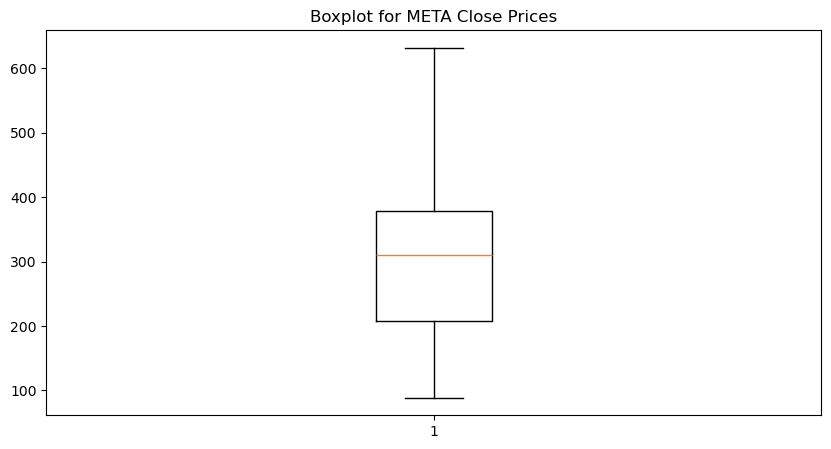

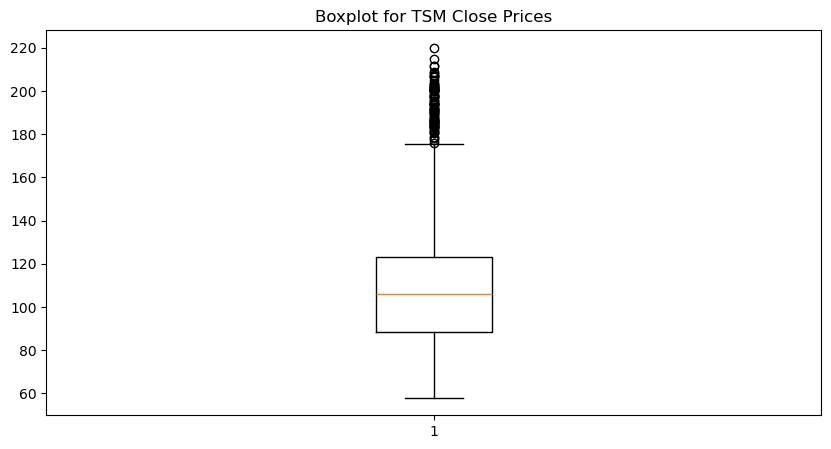

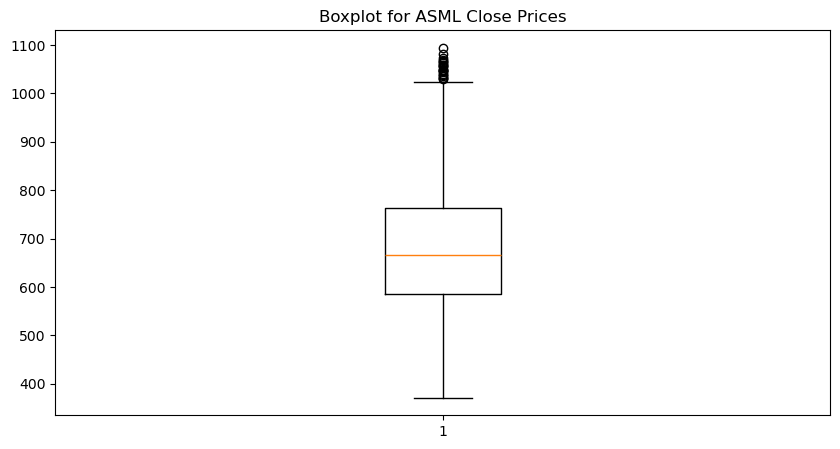

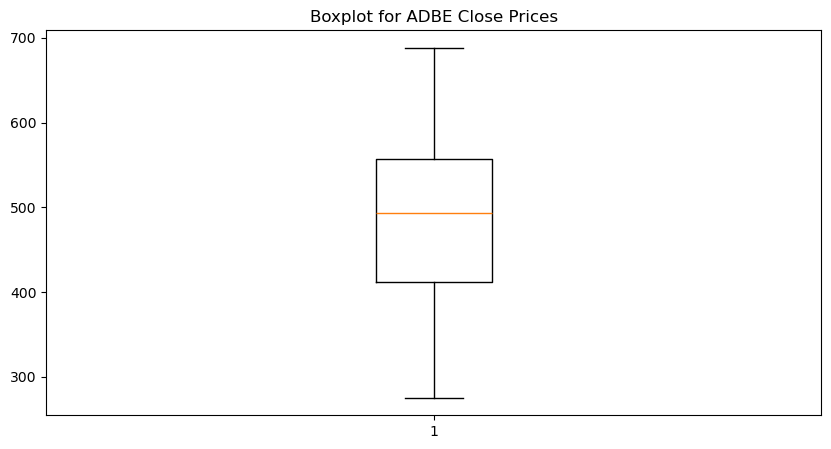

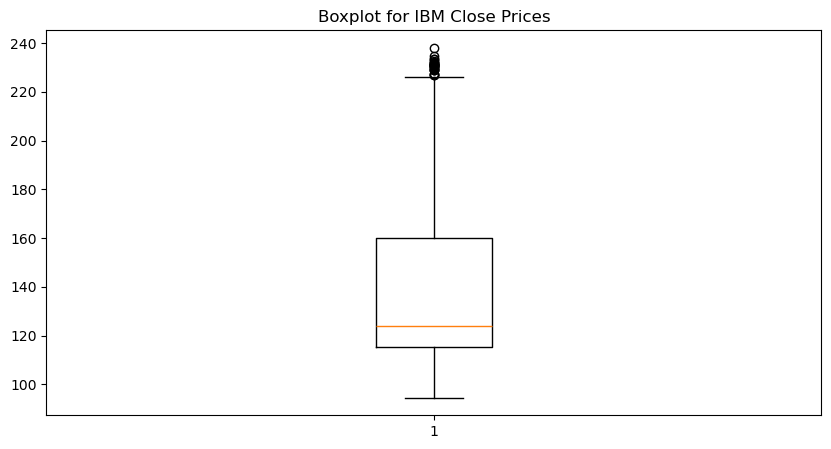

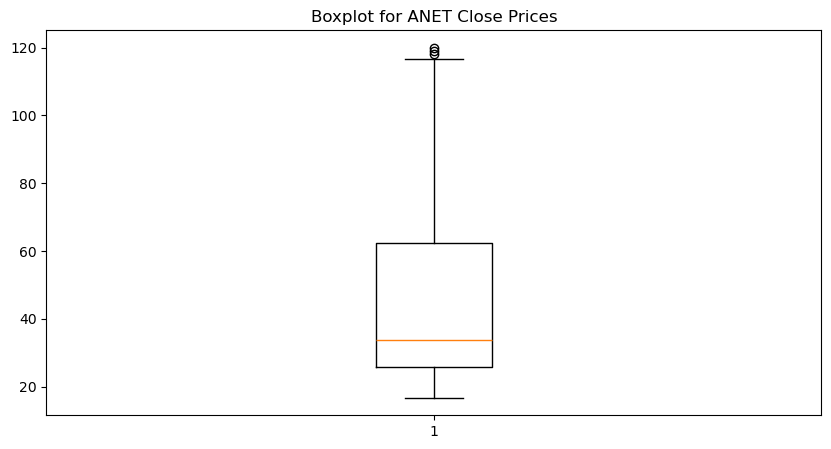

In [ ]:
import matplotlib.pyplot as plt
#Boxplot

for ticker in stocks_df:
    plt.figure(figsize=(10, 5))
    plt.title(f"Boxplot for {ticker} Close Prices")
    plt.boxplot(stocks_df[ticker]['Close'].dropna())
plt.show()



3. Stationarity Check:

Stationarity tests, such as the Augmented Dickey-Fuller (ADF) test, were conducted to determine if the time series data required differencing or detrending.


In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # Returns True if stationary

for ticker in stocks_df:
    print(f"{ticker} Stationarity: {check_stationarity(stocks_df[ticker]['Close'])}")

MSFT Stationarity: False
NVDA Stationarity: False
GOOGL Stationarity: False
AMZN Stationarity: False
META Stationarity: False
TSM Stationarity: False
ASML Stationarity: False
ADBE Stationarity: False
IBM Stationarity: False
ANET Stationarity: False




Data Integration

For comparative analysis, a consolidated dataset was created by merging the data for all tickers into a multi-index DataFrame:



In [ ]:
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = '2021-01-01'

def download_data(tickers, start):
    all_data = {}
    data = pd.DataFrame()
    for ticker in tickers:
        #print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data=pd.concat([data,df['Close']],axis=1)
    return data

# Download the data
data_df = download_data(tickers, start_date)
data_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker            MSFT       NVDA      GOOGL        AMZN        META  \
Date                                                                   
2021-01-04  210.423096  13.080301  85.994766  159.331497  267.916595   
2021-01-05  210.626038  13.370814  86.688255  160.925507  269.938873   
2021-01-06  205.164719  12.582565  85.832840  156.919006  262.307983   
2021-01-07  211.003052  13.310218  88.396561  158.108002  267.717346   
2021-01-08  212.288651  13.243137  89.566818  159.134995  266.551788   

Ticker             TSM        ASML        ADBE         IBM       ANET  
Date                                                                   
2021-01-04  104.098396  482.249115  485.339996   98.824791  17.697500  
2021-01-05  105.095596  487.418915  485.690002  100.578972  17.875626  
2021-01-06  107.742325  472.816376  466.309998  103.090660  17.866875  
2021-01-07  113.166267  483.628387  477.739990  102.851463  18.498125  
2021-01-08  110.612717  490.678864  485.100006  102.484673  19.132500

## Chapter 5: Data Exploration



### 5.1 Univariate Analysis
Univariate analysis focuses on examining the statistical properties and distribution of individual variables in the dataset, particularly the "Close" prices for each company. This analysis helps identify trends, patterns, and outliers within the data.

#### 1- Summary Statistics:

For each company's "Close" prices, key metrics such as mean, median, standard deviation, minimum, and maximum values were calculated to understand the central tendency and dispersion.

<Axes: title={'center': 'Summary Statistics of Close Prices'}>

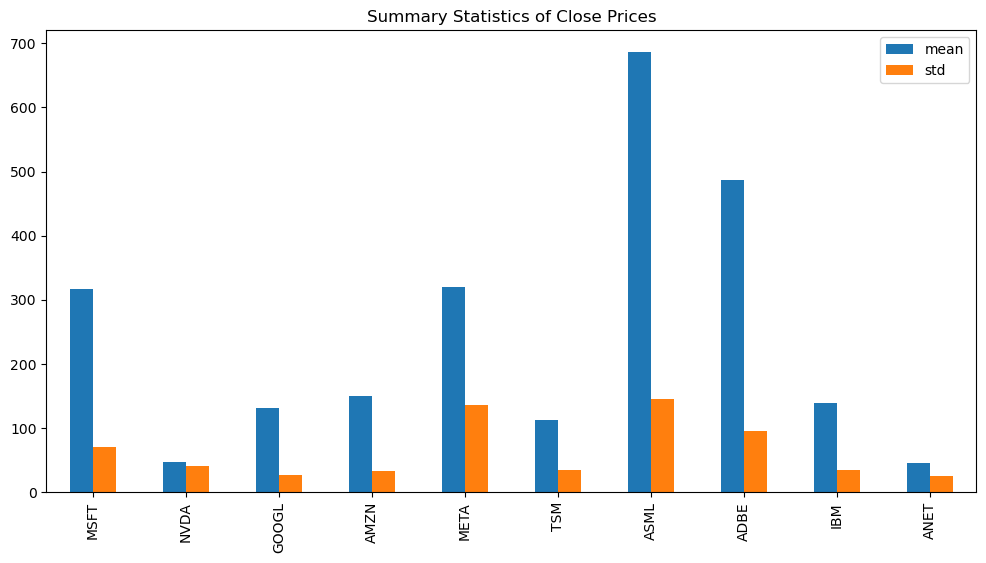

In [ ]:
import pandas as pd

summary_df = pd.DataFrame()

for ticker in stocks_df:
    stats = stocks_df[ticker]['Close'].describe()
    summary_df[ticker] = stats  # Add statistics as a column for each company

summary_df = summary_df.T

#print(summary_df)
summary_df
#summary_df.to_csv("summary_statistics.csv")

summary_df.drop(columns=["count","max","25%","75%","50%","min"]).plot(kind='bar', figsize=(12, 6), title='Summary Statistics of Close Prices')


#### Histograms:

Histograms were used to visualize the distribution of "Close" prices, identifying the frequency of different price ranges.

<Axes: title={'center': 'Histogram of Prices'}, ylabel='Frequency'>

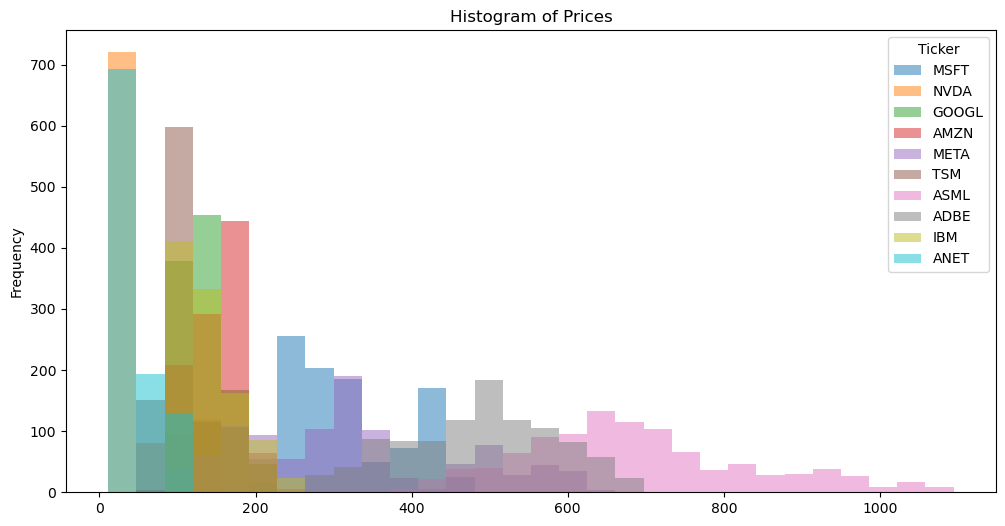

In [ ]:
import matplotlib.pyplot as plt

# for ticker in data_df:
#     plt.figure(figsize=(10, 5))
#     plt.hist(data_df[ticker]['Close'], bins=30, alpha=0.7, color='blue')
#     plt.title(f"Histogram of {ticker} Close Prices")
#     plt.xlabel("Close Price")
#     plt.ylabel("Frequency")
#     plt.show()
# type(data_df)
data_df.plot(kind='hist', bins=30, alpha=0.5,  figsize=(12, 6), title='Histogram of Prices')

#### Boxplots:

Boxplots were created to highlight the variability and detect potential outliers within the "Close" prices.

<Axes: title={'center': 'Boxplot of Prices'}>

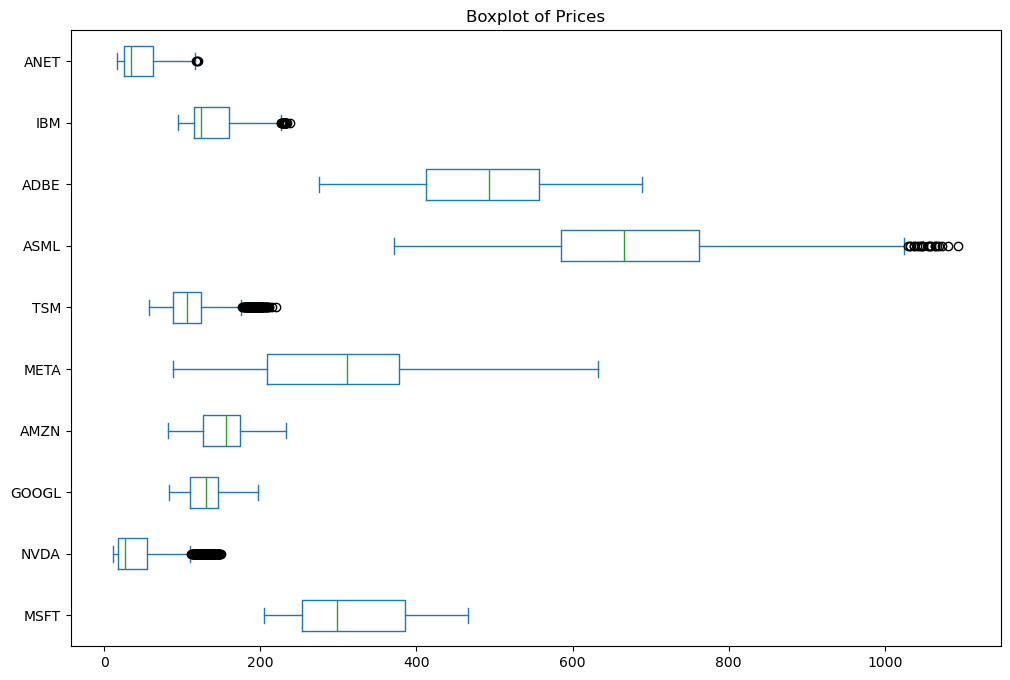

In [ ]:
# for ticker in stocks_df:
#     plt.figure(figsize=(10, 5))
#     plt.boxplot(stocks_df[ticker]['Close'], vert=False)
#     plt.title(f"Boxplot of {ticker} Close Prices")
#     plt.xlabel("Close Price")
#     plt.show()

data_df.plot(kind='box', vert=False, figsize=(12, 8), title='Boxplot of Prices')

#### Time Series Plots:

Time series plots of "Close" prices were generated to observe trends, seasonality, and volatility over time.

<Axes: title={'center': 'Close Prices Over Time'}, xlabel='Date'>

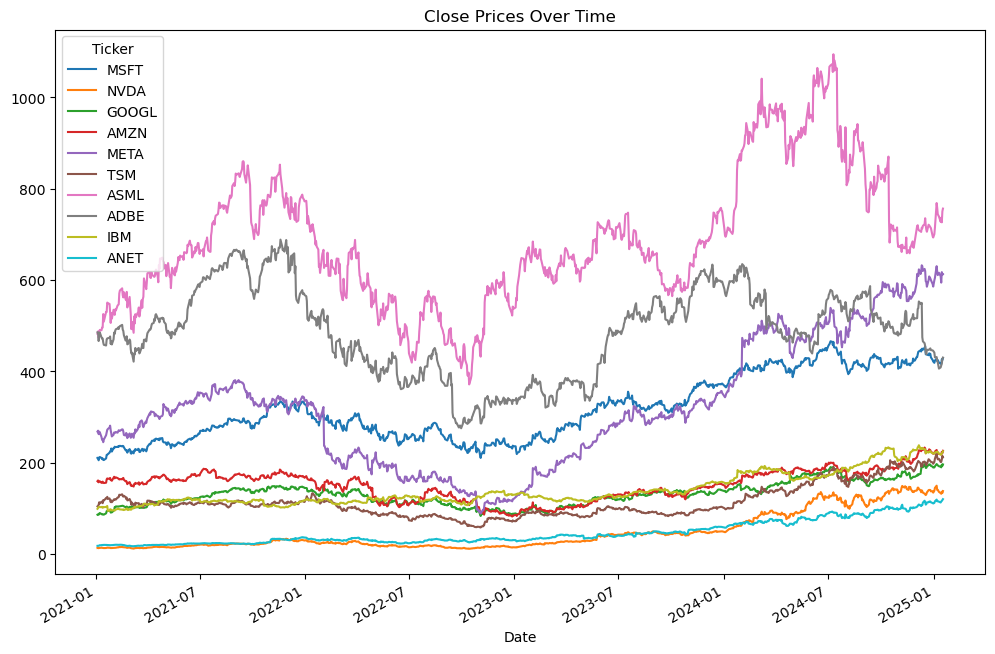

In [ ]:
# for ticker in stocks_df:
#     plt.figure(figsize=(10, 5))
#     plt.plot(stocks_df[ticker].index, stocks_df[ticker]['Close'], label=f"{ticker} Close")
#     plt.title(f"{ticker} Close Price Over Time")
#     plt.xlabel("Date")
#     plt.ylabel("Close Price")
#     plt.legend()
#     plt.show()

data_df.plot(figsize=(12, 8), title='Close Prices Over Time')

#### Observations from Univariate Analysis

Trends : All companies show long-term upward trends, reflecting growth in the investment in the technology sector.

Volatility : Stocks like ASML show higher variability, indicating periods of significant market activity.


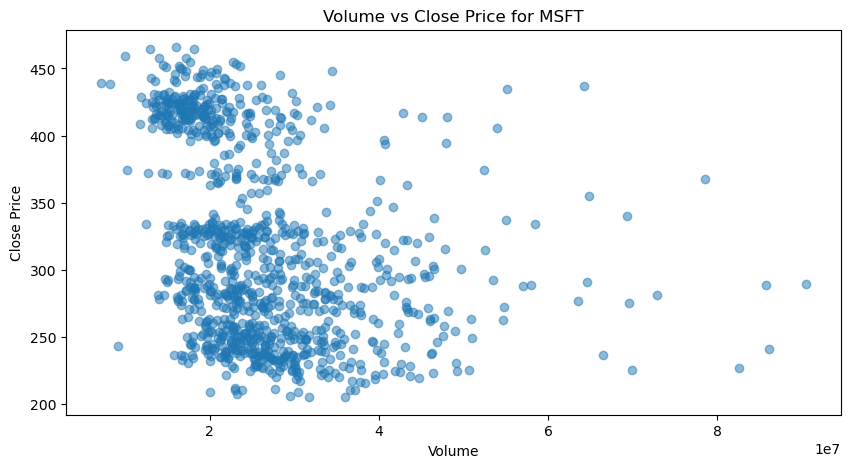

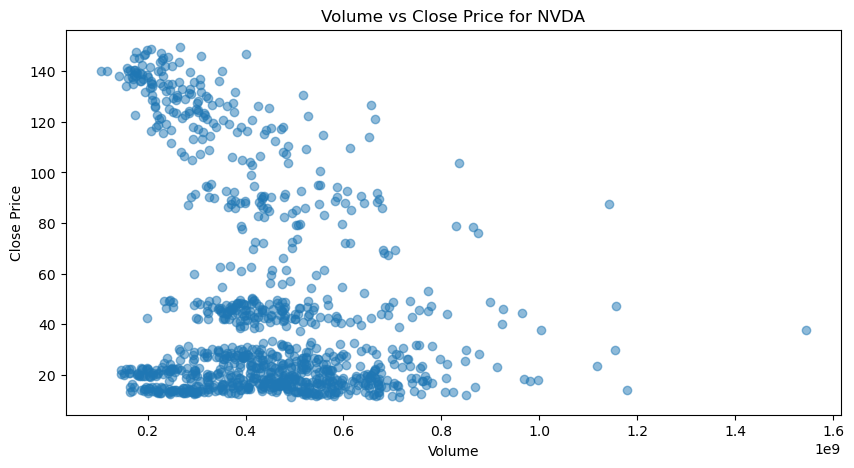

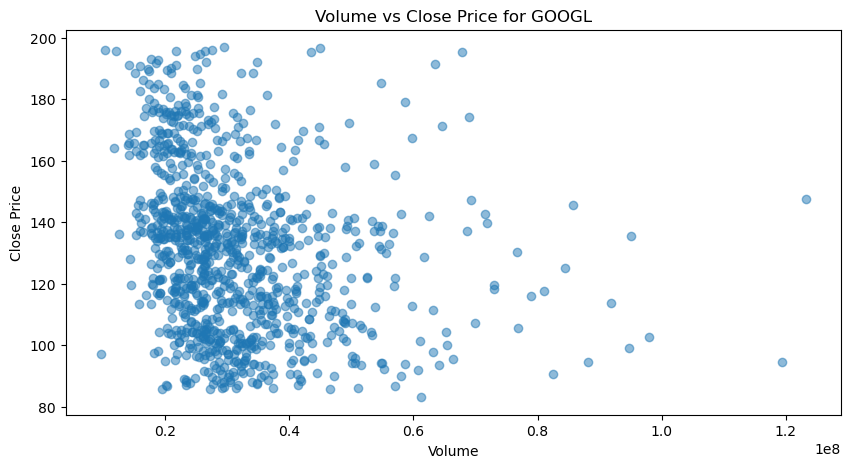

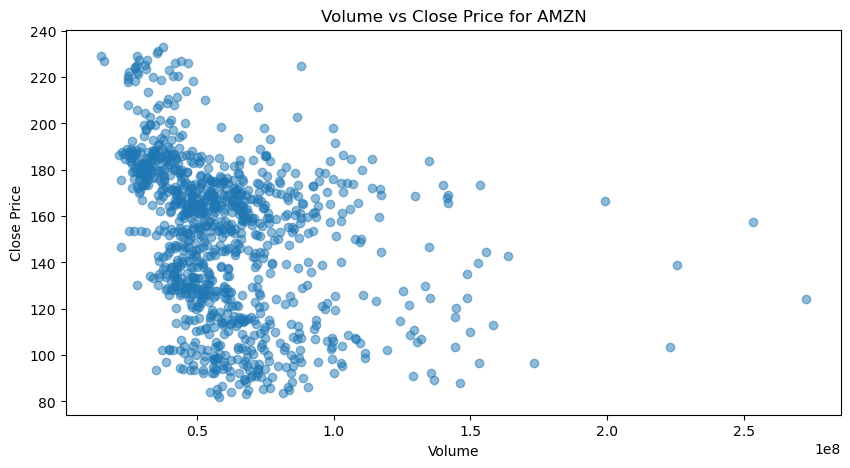

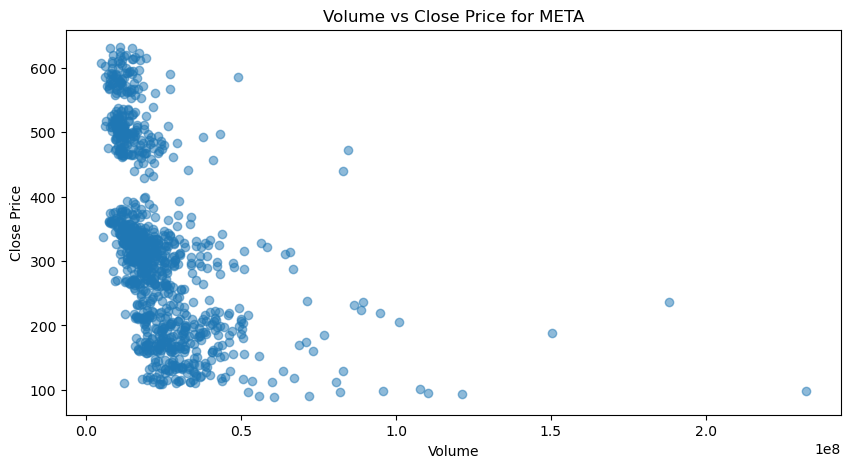

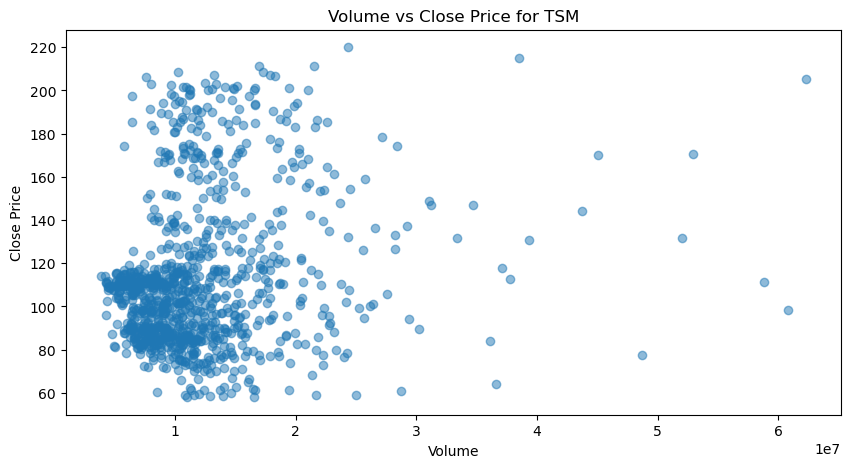

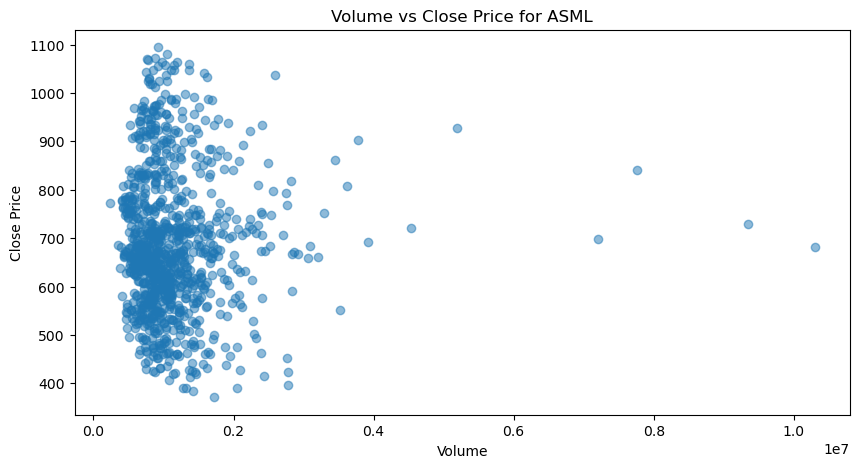

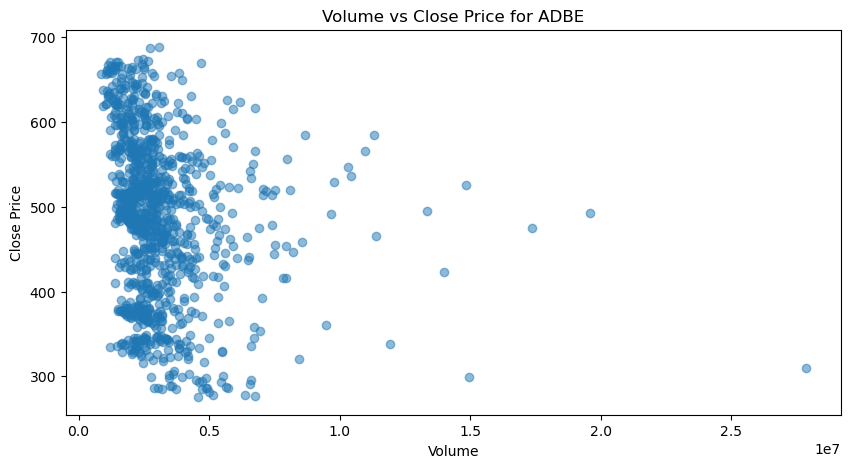

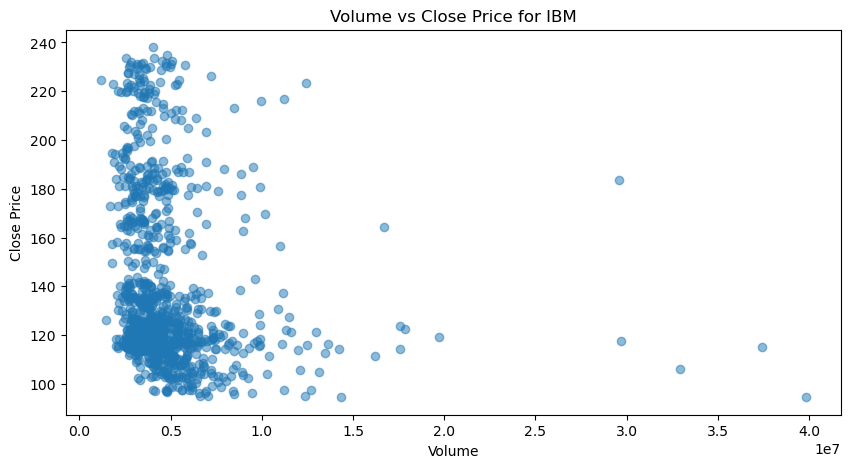

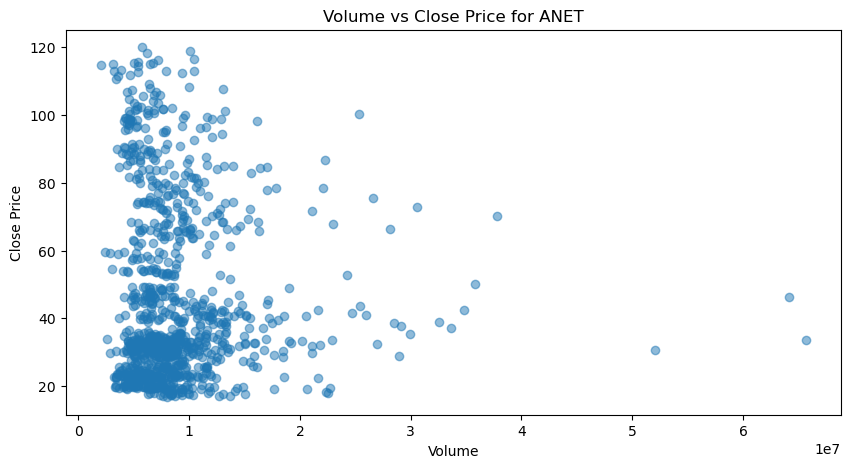

In [ ]:
for ticker in stocks_df:
    plt.figure(figsize=(10, 5))
    plt.scatter(stocks_df[ticker]['Volume'], stocks_df[ticker]['Close'], alpha=0.5)
    plt.title(f"Volume vs Close Price for {ticker}")
    plt.xlabel("Volume")
    plt.ylabel("Close Price")
    plt.show()

#### Observations from Bivariate Analysis

Weak Correlations: Most stocks showed weak correlations between "Close" prices and trading volumes, suggesting the value of volume cannot predict closing prices.


## 5.3 Relevant Multivariate Analysis

To examine broader relationships among the "Close" prices of the selected companies, a multivariate analysis was conducted using correlation matrices and heatmaps.

#### Correlation Matrix:

A correlation matrix was generated to evaluate the relationships among "Close" prices of all companies

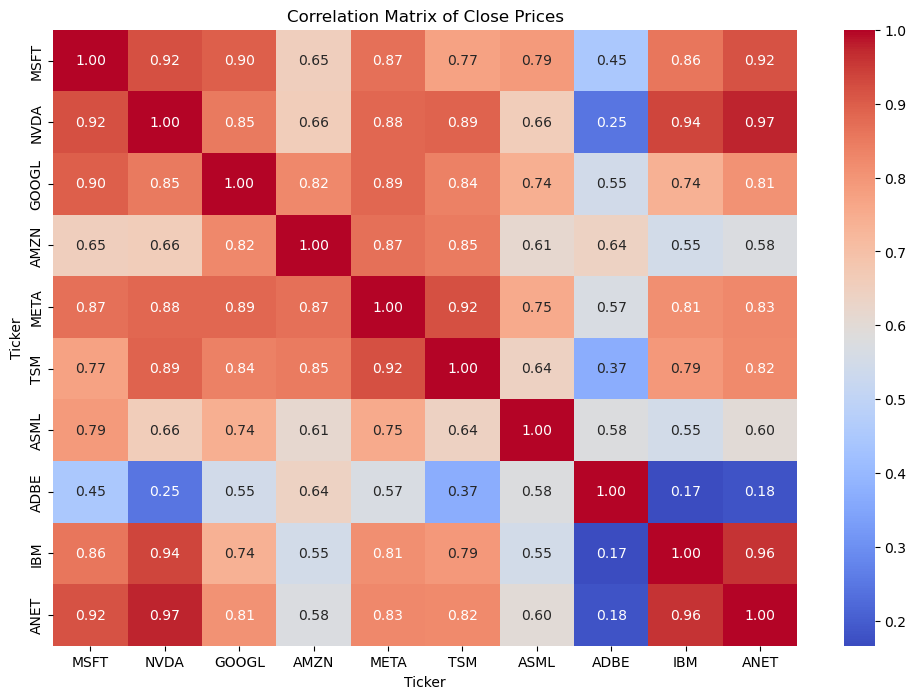

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Close Prices")
plt.show()

### Observations from Multivariate Analysis

Strong Correlations: Companies within similar sectors, such as MSFT and GOOGL, exhibit higher correlations in their "Close" prices, reflecting possible shared market drivers.

Weak Correlations: Companies like IBM and ADBE showed weaker correlations, possibly due to differences in their business models or market conditions.

# Chapter 6: Analysis

## 6.1 Model Descriptions

### ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a traditional statistical method for time series forecasting. It combines three components: autoregression (AR), integration (I), and moving average (MA). ARIMA is effective for modeling stationary data and has been a baseline for time series analysis for decades (Siami-Namini et al., 2019). Despite its simplicity, ARIMA struggles with non-linear and non-stationary datasets, making it less suitable for complex financial markets.

### LSTM (Long Short-Term Memory)

LSTM is a type of recurrent neural network (RNN) specifically designed to handle sequential data by capturing long-term dependencies. It employs gates to regulate the flow of information, addressing vanishing gradient problems in traditional RNNs. LSTM models excel at processing complex, high-dimensional time series data, such as stock prices (Chen et al., 2024).

### BiLSTM (Bidirectional Long Short-Term Memory)

BiLSTM enhances traditional LSTM by processing data in both forward and backward directions, improving the model's contextual understanding. This bidirectional approach is particularly useful for financial time series data, as it captures intricate patterns influenced by past and future contexts (Siami-Namini et al., 2019).

### Prophet

Prophet, developed by Facebook, is a user-friendly forecasting tool that decomposes time series into trend, seasonality, and holiday effects. It is particularly effective for datasets with strong seasonal patterns and outliers. Prophet's interpretability and ease of use make it a popular choice for business applications (Taylor and Letham, 2018).

### N-BEATS

N-BEATS is a deep learning architecture designed for univariate time series forecasting. It uses fully connected layers and residual connections to model trends and seasonality, achieving state-of-the-art performance on benchmark datasets (Oreshkin et al., 2019). The model's interpretability and scalability make it a powerful tool for financial forecasting.

### DeepAR

DeepAR, developed by Amazon, is a probabilistic forecasting model based on RNNs. It generates confidence intervals for predictions, making it suitable for risk assessment and decision-making in volatile markets. DeepAR is particularly effective for large-scale time series datasets (Salinas et al., 2020).

### Temporal Convolutional Networks (TCN)

TCNs are convolutional architectures designed for sequential data. They use causal and dilated convolutions to capture long-term dependencies efficiently. TCNs train faster and are more stable than RNN-based models, making them ideal for financial forecasting (Chen et al., 2024).

## 6.2 Data Preparation and Process

### Data Splitting

The dataset was split into training (80%) and testing (20%) sets to evaluate model performance. Temporal integrity was preserved by avoiding random shuffling, ensuring that the training set contains earlier data while the testing set contains subsequent data. This method aligns with time series forecasting best practices (Lawi et al., 2022).

### Feature Scaling

To enhance model performance, the "Close" prices were normalized using Min-Max scaling. This step ensures that models, particularly those based on neural networks, can process data efficiently and converge faster during training (Siami-Namini et al., 2019).

## 6.3 Evaluation Metrics

To evaluate model performance, multiple metrics were employed:

#### Mean Absolute Error (MAE):
Measures the average magnitude of prediction errors without considering their direction. MAE is easy to interpret but less sensitive to large errors (Oreshkin et al., 2019).

#### Root Mean Squared Error (RMSE):
Provides a more sensitive measure of errors by penalizing large deviations. RMSE is particularly useful for evaluating models where large errors are costly (Chen et al., 2024).

#### Mean Absolute Percentage Error (MAPE):
Quantifies the accuracy of predictions as a percentage of actual values, making it useful for comparing performance across datasets (Salinas et al., 2020).

#### R-Squared (R²):
Indicates the proportion of variance explained by the model, providing a measure of goodness-of-fit (Siami-Namini et al., 2019).



# 6.4 ARIMA

## ARIMA Evaluate Tests
#### Ljung-Box Test

The Ljung-Box test checks if residuals from the ARIMA model are uncorrelated, ensuring that no significant autocorrelation exists. This is essential for validating the assumption that the residuals are white noise.

#### ARCH-LM Test

The ARCH-LM test assesses the presence of heteroscedasticity (changing variance) in residuals, a common feature in financial time series data.

Null Hypothesis: There is no heteroscedasticity in the residuals (variance is constant).

Alternative Hypothesis: There is heteroscedasticity in the residuals (variance changes over time).

#### Shapiro-Wilk Test

The Shapiro-Wilk test evaluates whether residuals follow a normal distribution, a key assumption for statistical time series models. Deviations from normality could indicate potential model misspecification.

%%time
import warnings
warnings.filterwarnings('ignore')
from arch import arch_model

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.graphics.tsaplots import plot_acf

# Split data into training and testing
train_size = int(len(data_df) * 0.8)
train, test = data_df[:train_size], data_df[train_size:]

for tick in tickers:
    # Auto ARIMA model
    model = pm.auto_arima(train[tick], seasonal=False, stepwise=True, suppress_warnings=True)
    forecast = model.predict(len(test))
    
    # ARIMA evaluation metrics
    arima_mae = mean_absolute_error(test[tick], forecast)
    arima_rmse = np.sqrt(mean_squared_error(test[tick], forecast))
    arima_mape = mean_absolute_percentage_error(test[tick], forecast)
    arima_r2 = r2_score(test[tick], forecast)
    
    
    print(f"{tick} - ARIMA Model Summary:")
    
    print(f"{tick} - Mean Absolute Error: {arima_mae}")
    print(f"{tick} - Root Mean Squared Error: {arima_rmse}")
    print(f"{tick} - Mean Absolute Percentage Error: {arima_mape}")
    print(f"{tick} - R2 Score: {arima_r2}")
    
    # Extract ARIMA order
    p, d, q = model.order
    arima_model = ARIMA(data_df[tick], order=(p, d, q)).fit()
    resids = arima_model.resid[1:]  # Skip the first residual
    
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(resids)
    plt.title(f"Residuals of ARIMA Model for {tick}")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.show()

    # Diagnostic tests
    ljung = acorr_ljungbox(resids, lags=[10], return_df=True)
    print(f"{tick} Ljung-Box test: {ljung['lb_pvalue'].values[0]}")
    
    test_stat, arch_p_value, _, _ = het_arch(resids)
    print(f"{tick} ARCH-LM Test p-value: {arch_p_value}")

    stat, shapiro_p = shapiro(resids)
    print(f"{tick} Shapiro-Wilk Test p-value: {shapiro_p}")
    
    sm.qqplot(resids, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()
    
    
    if arch_p_value < 0.05:
        print(f"{tick}: Significant heteroscedasticity detected. Fitting GARCH model.")
        
        
        garch_model = arch_model(resids, vol='Garch', p=1, q=1)
        garch_fit = garch_model.fit()
        print(garch_fit.summary())
        
        
        garch_residuals = garch_fit.std_resid  # Standardized residuals

        
        test_stat, arch_p_value, _, _ = het_arch(garch_residuals)
        print(f"ARCH-LM Test p-value (GARCH residuals): {arch_p_value}")
        if arch_p_value < 0.05:
            print("Significant heteroscedasticity detected in GARCH residuals.")
        else:
            print("No significant heteroscedasticity detected in GARCH residuals.")
        
        
        
        
        # Plot GARCH conditional variance
        plt.figure(figsize=(10, 6))
        plt.plot(garch_fit.conditional_volatility)
        plt.title(f"GARCH Conditional Volatility for {tick}")
        plt.xlabel("Time")
        plt.ylabel("Volatility")
        plt.show()
    
    # Forecast visualization
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train[tick], label='Training Data')
    plt.plot(test.index, test[tick], label='Actual Prices')
    plt.plot(test.index, forecast, label='Forecasted Prices', linestyle='-')
    plt.title(f"ARIMA Model - {tick} Stock Price Forecasting")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()




MSFT - ARIMA Model Summary:
MSFT - Mean Absolute Error: 0.02805996108530717
MSFT - Root Mean Squared Error: 0.03691309359978249
MSFT - Mean Absolute Percentage Error: 0.004627300744739035
MSFT - R2 Score: -0.07552294711278607


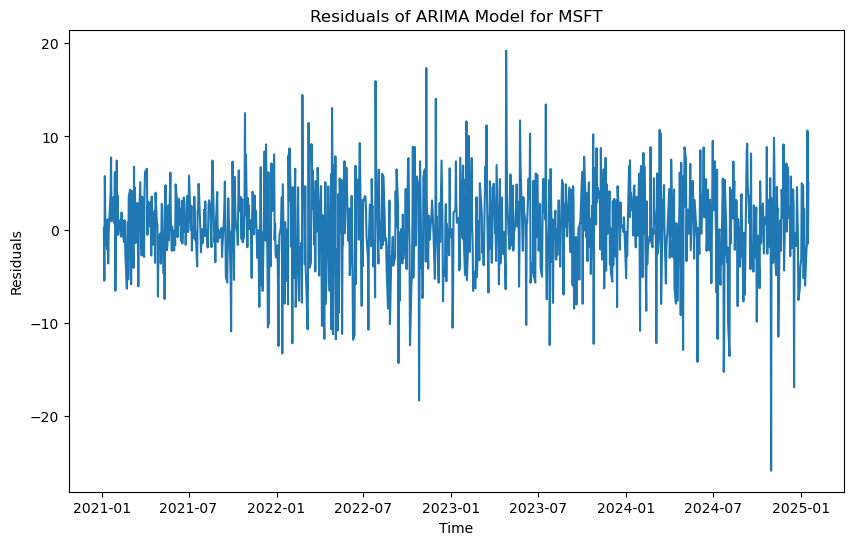

MSFT Ljung-Box test: 0.9787162781817772
MSFT ARCH-LM Test p-value: 0.6423685409733677
MSFT Shapiro-Wilk Test p-value: 1.1530595124111386e-08


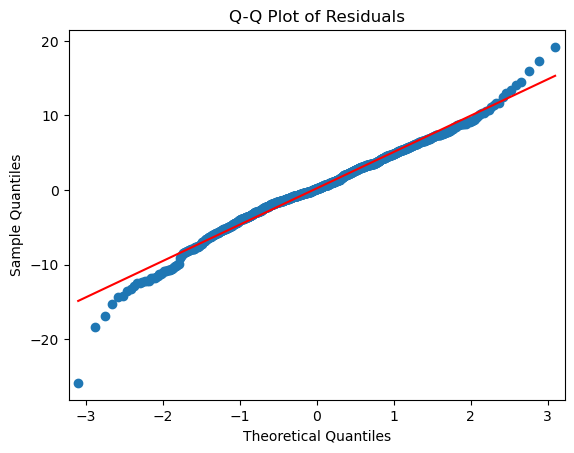

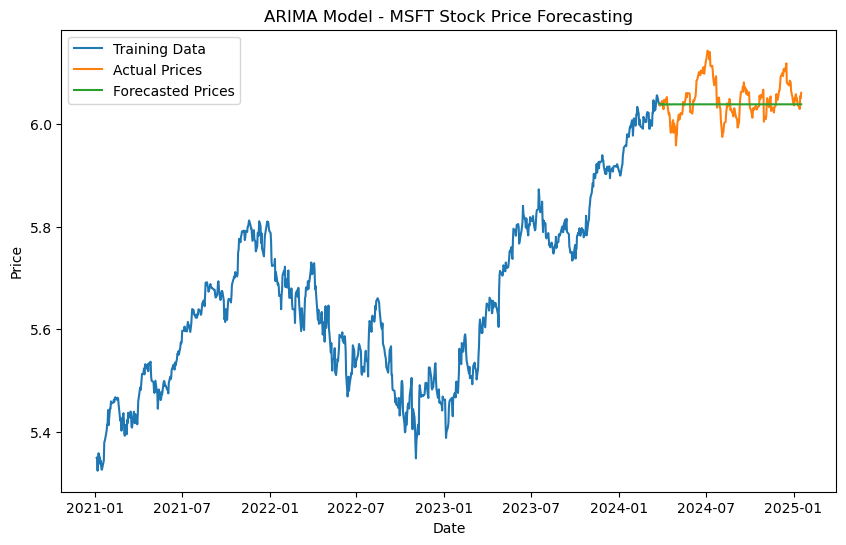

NVDA - ARIMA Model Summary:
NVDA - Mean Absolute Error: 0.08173617018693823
NVDA - Root Mean Squared Error: 0.0968318820578184
NVDA - Mean Absolute Percentage Error: 0.017259078088512812
NVDA - R2 Score: 0.6811854270669594


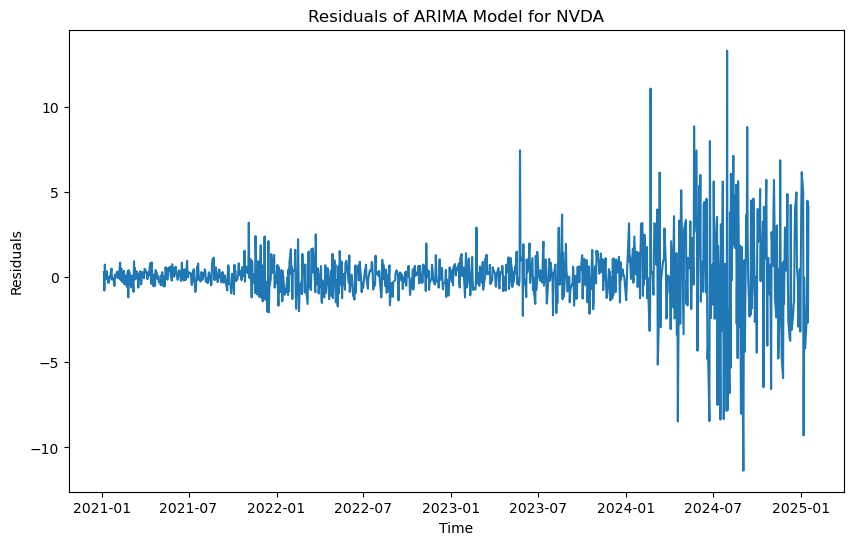

NVDA Ljung-Box test: 0.0001085000824006457
NVDA ARCH-LM Test p-value: 7.261365716010239e-38
NVDA Shapiro-Wilk Test p-value: 9.324531022693581e-32


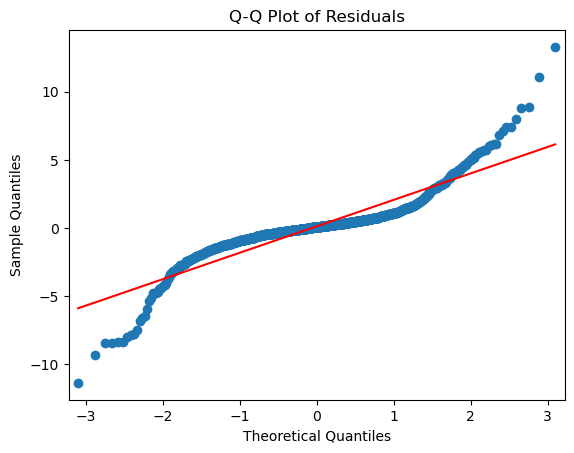

NVDA: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 19247.564580355855
Iteration:      2,   Func. Count:     14,   Neg. LLF: 125991.72870988326
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1599.832641333223
Iteration:      4,   Func. Count:     26,   Neg. LLF: 2584.2447567026
Iteration:      5,   Func. Count:     32,   Neg. LLF: 6166.503670353238
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1902.4217505975244
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1572.8570845385916
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1572.256843271045
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1572.1416133368843
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1572.1130956118059
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1572.1052347833547
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1572.103532518519
Iteration:     13,   Func. Count:     75,   Neg. LLF: 1572.1035

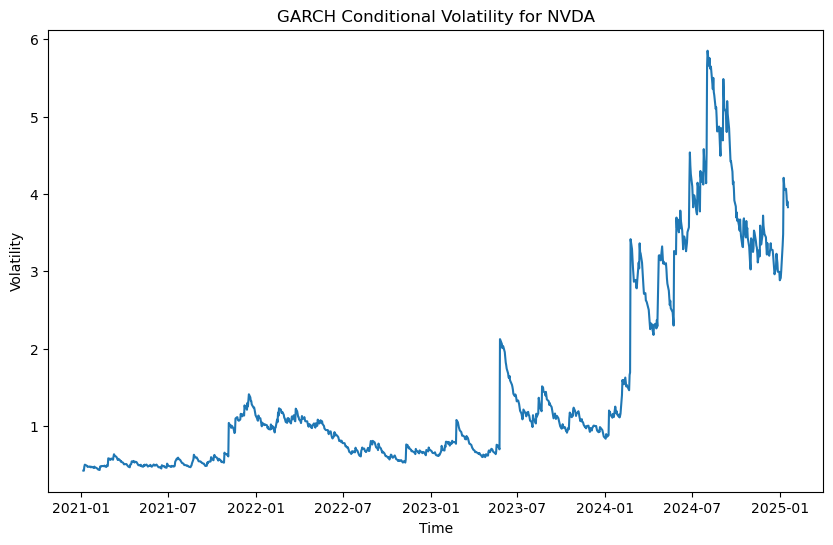

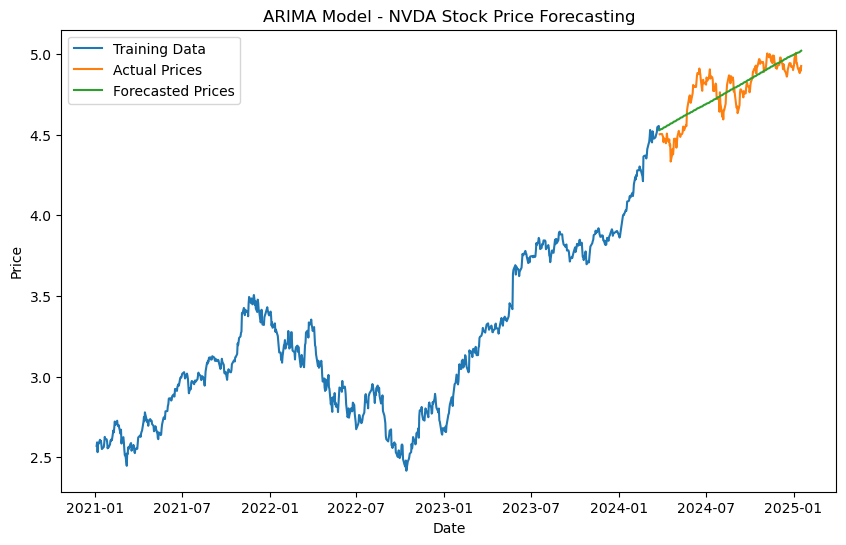

GOOGL - ARIMA Model Summary:
GOOGL - Mean Absolute Error: 0.12872588903236565
GOOGL - Root Mean Squared Error: 0.14625558537194028
GOOGL - Mean Absolute Percentage Error: 0.0248658126470935
GOOGL - R2 Score: -3.3859436371446163


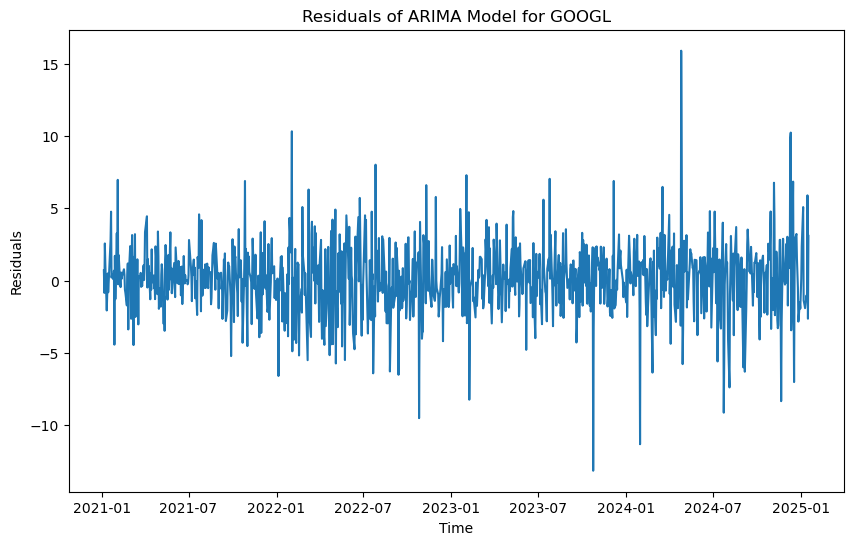

GOOGL Ljung-Box test: 0.34299025525277094
GOOGL ARCH-LM Test p-value: 0.3716324357212738
GOOGL Shapiro-Wilk Test p-value: 8.457204758775865e-16


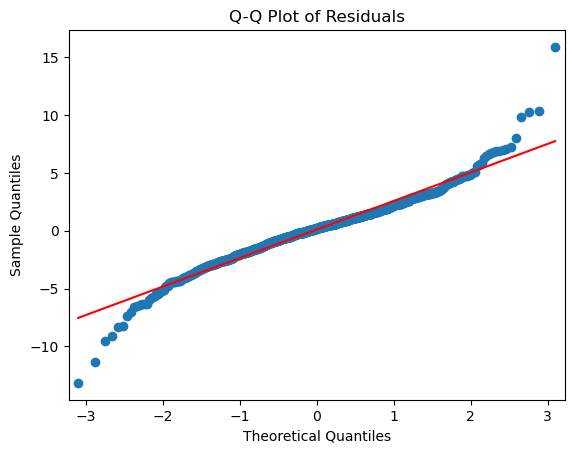

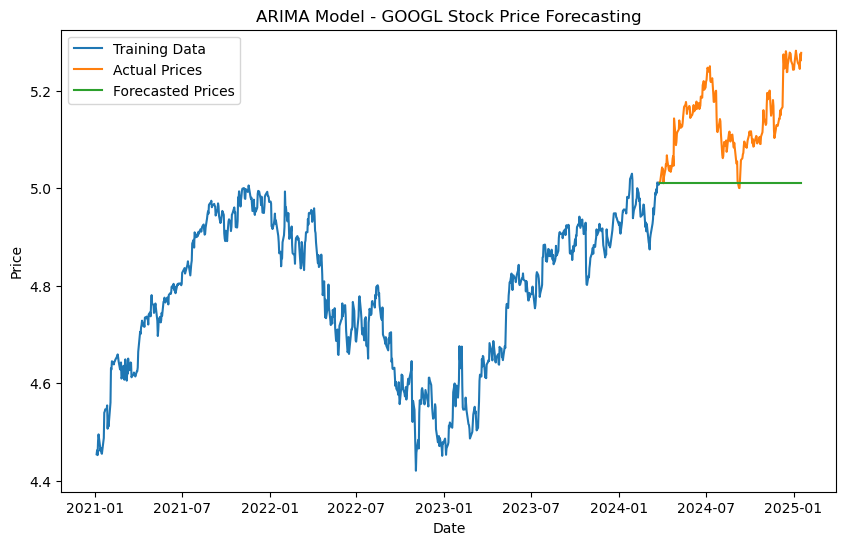

AMZN - ARIMA Model Summary:
AMZN - Mean Absolute Error: 0.07967019970335272
AMZN - Root Mean Squared Error: 0.1085361588014445
AMZN - Mean Absolute Percentage Error: 0.014968675228182049
AMZN - R2 Score: -0.7101501296479402


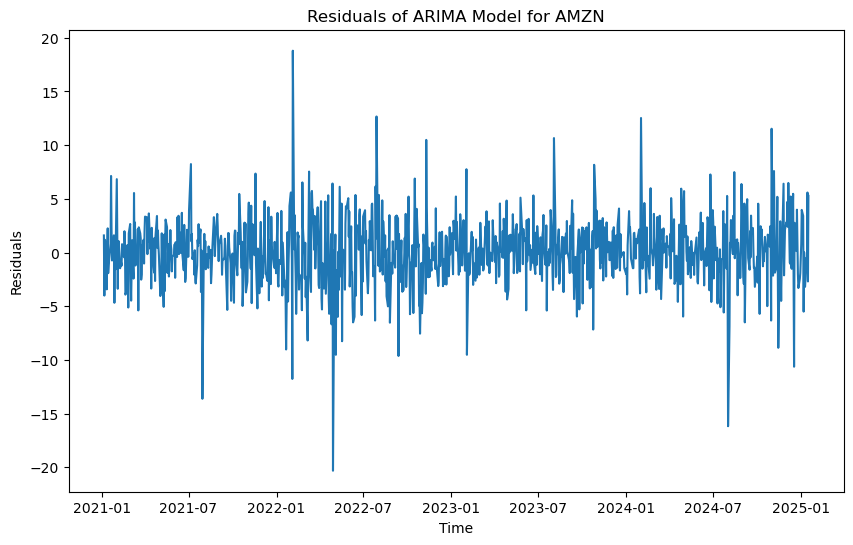

AMZN Ljung-Box test: 0.4899316372259611
AMZN ARCH-LM Test p-value: 0.026339312444833875
AMZN Shapiro-Wilk Test p-value: 3.1029652921575794e-16


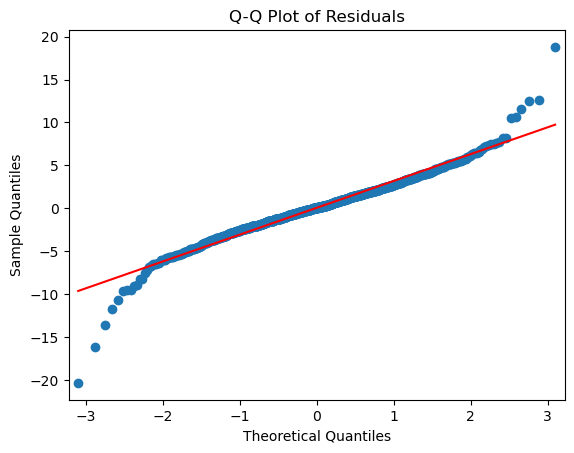

AMZN: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3961.06014869541
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3347.504780271035
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2729.4700517987994
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2588.5597027143995
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2564.8662466266587
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2564.839337568721
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2564.8389661924284
Iteration:      8,   Func. Count:     49,   Neg. LLF: 2564.838955551186
Iteration:      9,   Func. Count:     54,   Neg. LLF: 2564.838952386667
Iteration:     10,   Func. Count:     58,   Neg. LLF: 2564.8389523866836
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2564.838952386667
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10

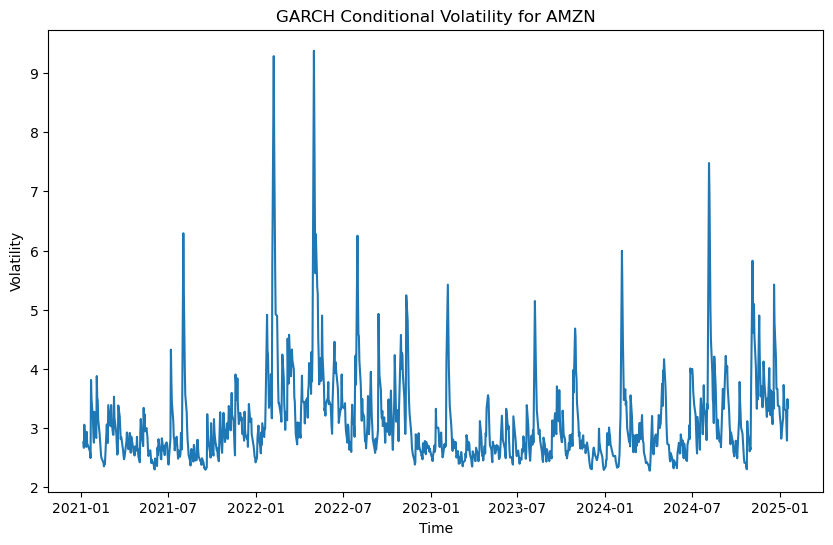

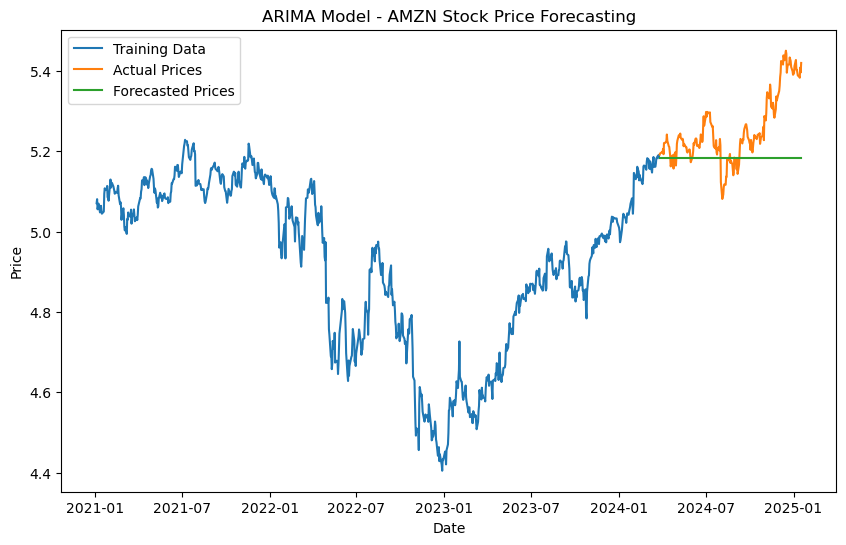

META - ARIMA Model Summary:
META - Mean Absolute Error: 0.09554827190013822
META - Root Mean Squared Error: 0.11906471846274533
META - Mean Absolute Percentage Error: 0.015093447669942176
META - R2 Score: -0.5198928571731782


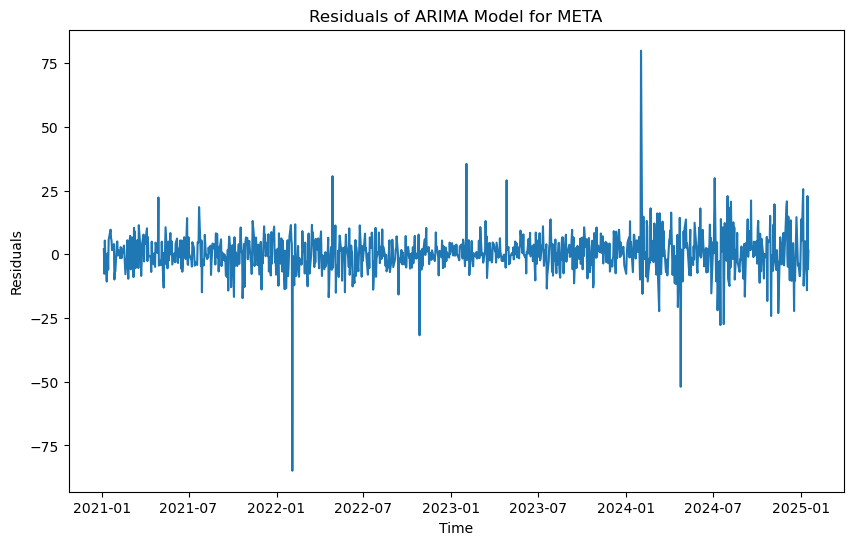

META Ljung-Box test: 0.4858285304930725
META ARCH-LM Test p-value: 0.9998271501039478
META Shapiro-Wilk Test p-value: 1.1617413295355433e-29


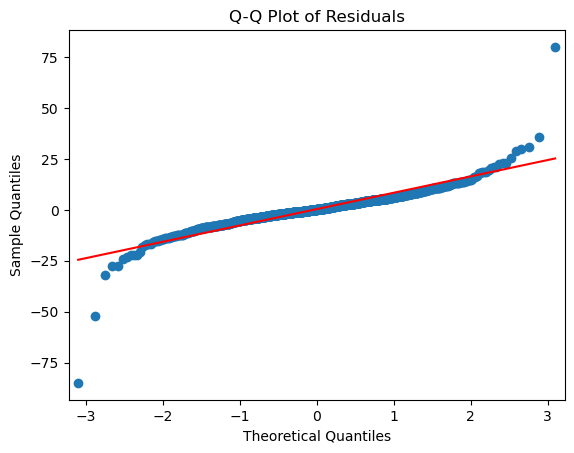

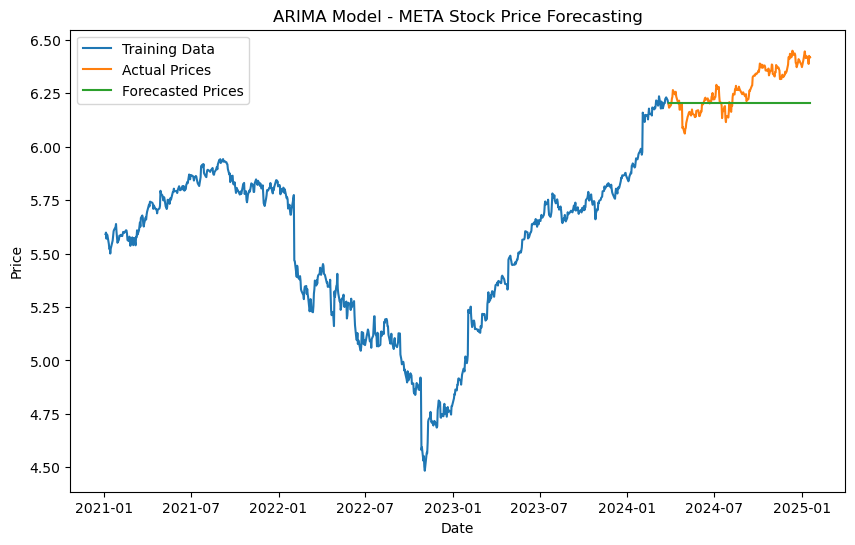

TSM - ARIMA Model Summary:
TSM - Mean Absolute Error: 0.22369611266937006
TSM - Root Mean Squared Error: 0.25527715352409364
TSM - Mean Absolute Percentage Error: 0.04291987972312471
TSM - R2 Score: -2.8640988024549077


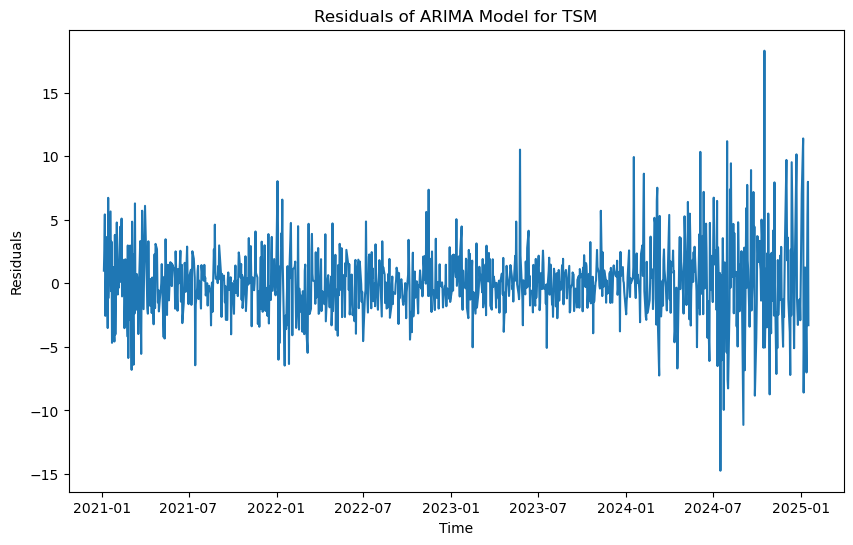

TSM Ljung-Box test: 0.01382642360457996
TSM ARCH-LM Test p-value: 1.2527729978690212e-13
TSM Shapiro-Wilk Test p-value: 2.200921741464566e-18


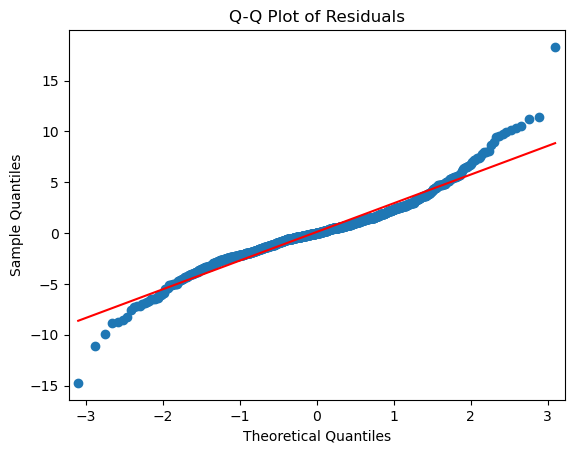

TSM: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 17470702888.035484
Iteration:      2,   Func. Count:     14,   Neg. LLF: 26835.450231785348
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3847.6539958614576
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2376.1937409683896
Iteration:      5,   Func. Count:     36,   Neg. LLF: 2375.6106953955295
Iteration:      6,   Func. Count:     42,   Neg. LLF: 2370.067165280795
Iteration:      7,   Func. Count:     48,   Neg. LLF: 2366.1291333190875
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2365.3726804223775
Iteration:      9,   Func. Count:     60,   Neg. LLF: 2365.0870126450436
Iteration:     10,   Func. Count:     66,   Neg. LLF: 2365.0575989650806
Iteration:     11,   Func. Count:     71,   Neg. LLF: 2365.057584719938
Iteration:     12,   Func. Count:     75,   Neg. LLF: 2365.057584719923
Optimization terminated successfully    (Exit mode 0)
      

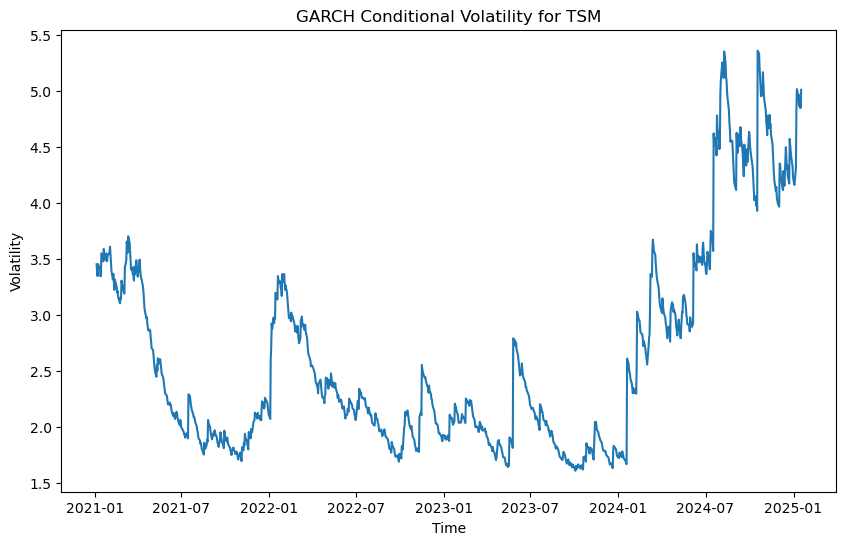

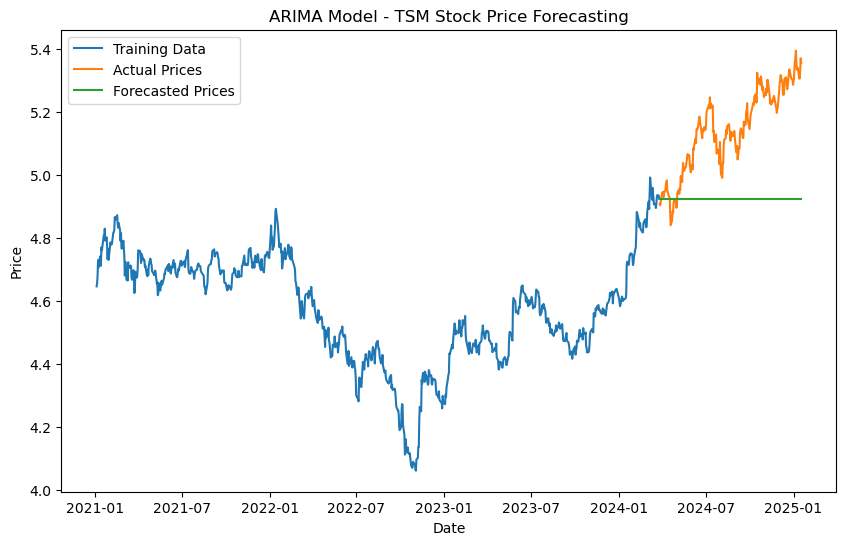

ASML - ARIMA Model Summary:
ASML - Mean Absolute Error: 0.16120355154809526
ASML - Root Mean Squared Error: 0.20036507653207808
ASML - Mean Absolute Percentage Error: 0.024305134952828773
ASML - R2 Score: -0.9072728543330624


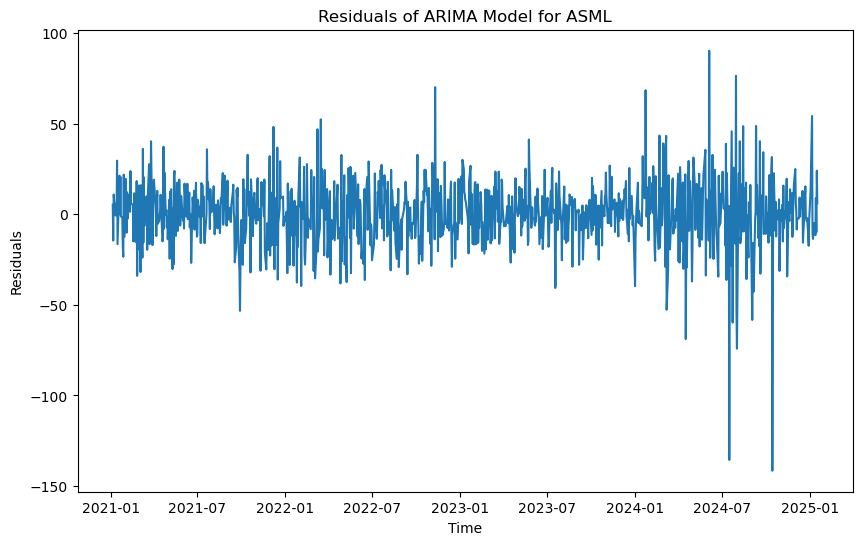

ASML Ljung-Box test: 0.5903512347620372
ASML ARCH-LM Test p-value: 0.0020365049176772156
ASML Shapiro-Wilk Test p-value: 9.880785763824316e-20


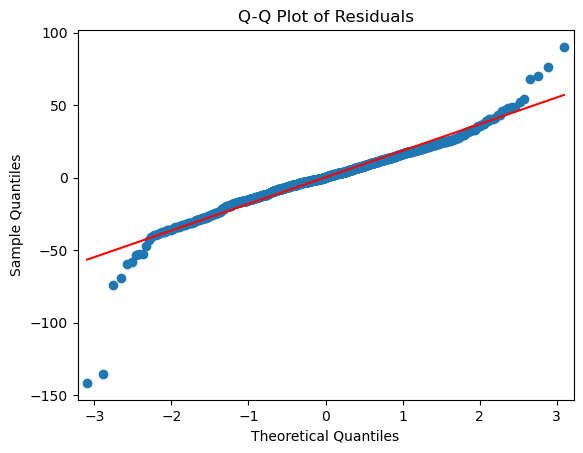

ASML: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5068.574045153833
Iteration:      2,   Func. Count:     12,   Neg. LLF: 5955.232232133329
Iteration:      3,   Func. Count:     20,   Neg. LLF: 4437.575354546409
Iteration:      4,   Func. Count:     26,   Neg. LLF: 4349.635071449069
Iteration:      5,   Func. Count:     32,   Neg. LLF: 4345.920234351686
Iteration:      6,   Func. Count:     38,   Neg. LLF: 4343.288340791968
Iteration:      7,   Func. Count:     44,   Neg. LLF: 4341.3525577862
Iteration:      8,   Func. Count:     50,   Neg. LLF: 4341.284796119873
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4340.99033303853
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4340.989598899561
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4340.989597096319
Iteration:     12,   Func. Count:     70,   Neg. LLF: 4340.989597098129
Optimization terminated successfully    (Exit mode 0)
            Curre

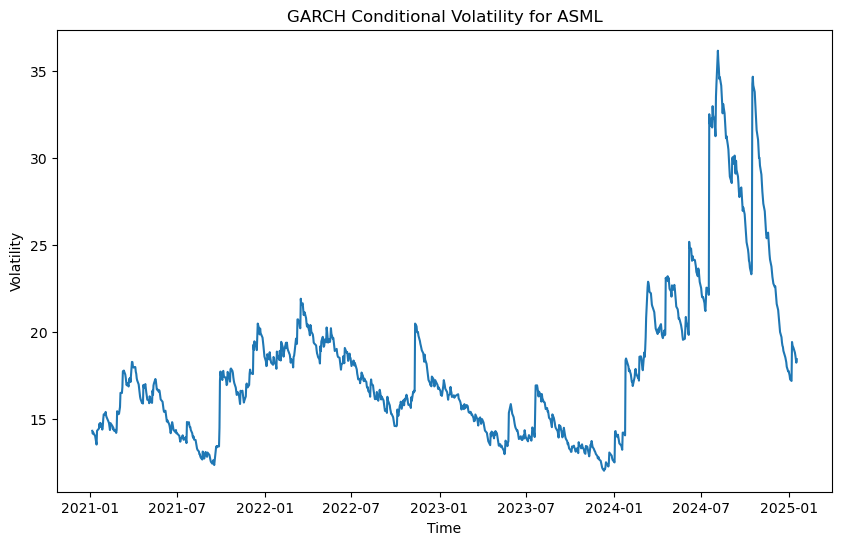

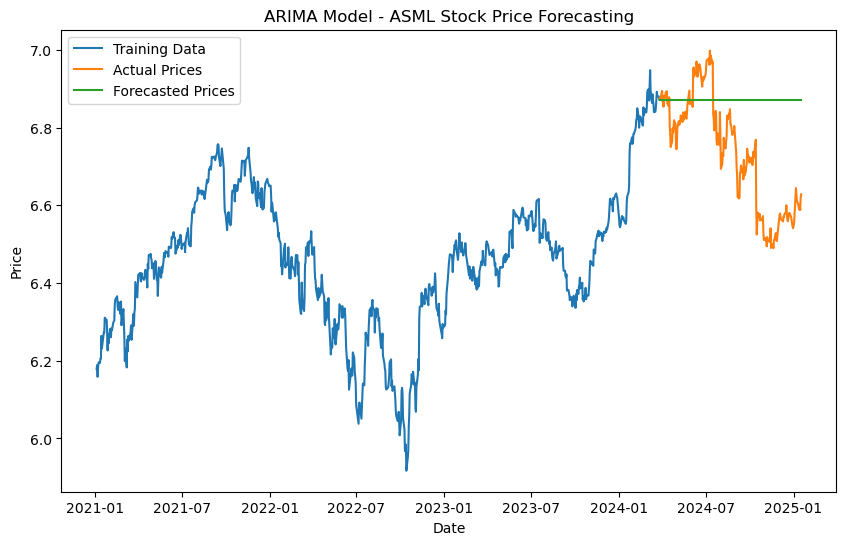

ADBE - ARIMA Model Summary:
ADBE - Mean Absolute Error: 0.068366842841084
ADBE - Root Mean Squared Error: 0.08314742198547403
ADBE - Mean Absolute Percentage Error: 0.011020656067818707
ADBE - R2 Score: -0.012375415246936416


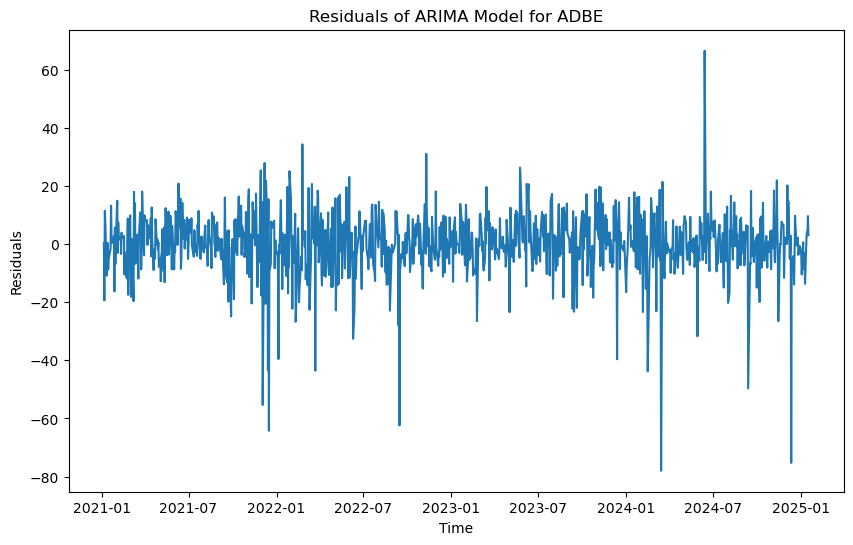

ADBE Ljung-Box test: 0.9352464763378258
ADBE ARCH-LM Test p-value: 0.5923311336695234
ADBE Shapiro-Wilk Test p-value: 1.9131395579776016e-25


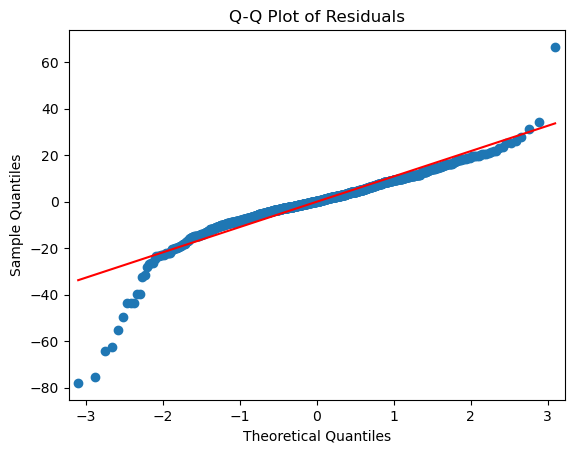

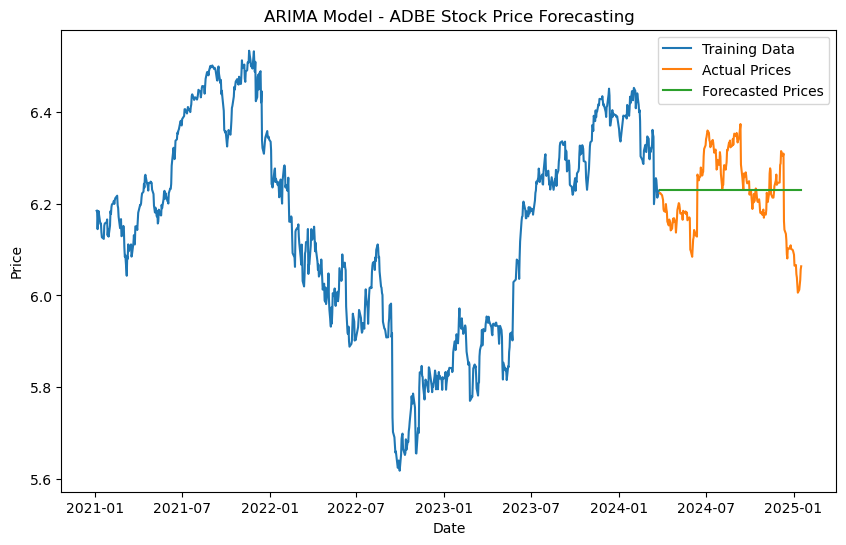

IBM - ARIMA Model Summary:
IBM - Mean Absolute Error: 0.07163991003377528
IBM - Root Mean Squared Error: 0.08558440392086138
IBM - Mean Absolute Percentage Error: 0.013667546889960747
IBM - R2 Score: 0.49976941663540275


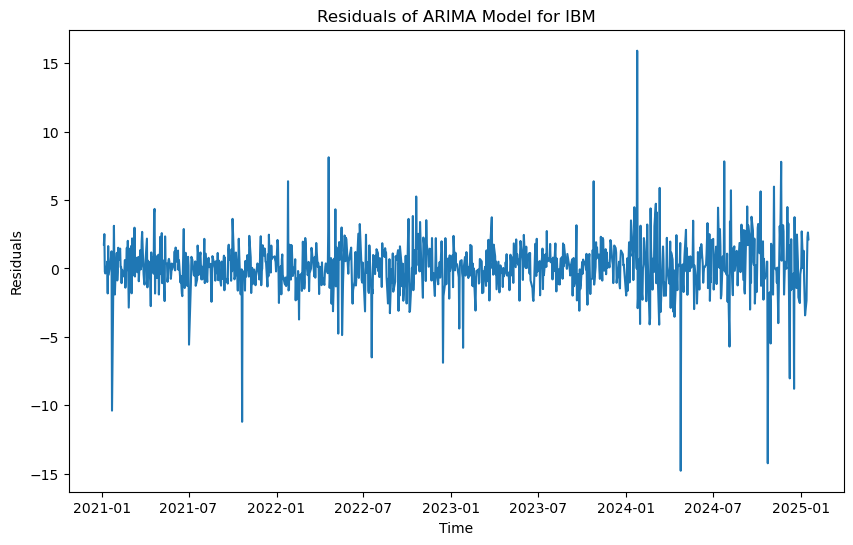

IBM Ljung-Box test: 0.7393892469204498
IBM ARCH-LM Test p-value: 0.7688327209418111
IBM Shapiro-Wilk Test p-value: 1.4547294994648443e-27


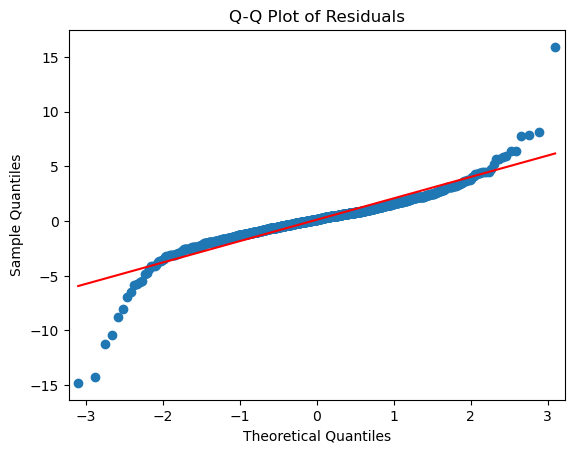

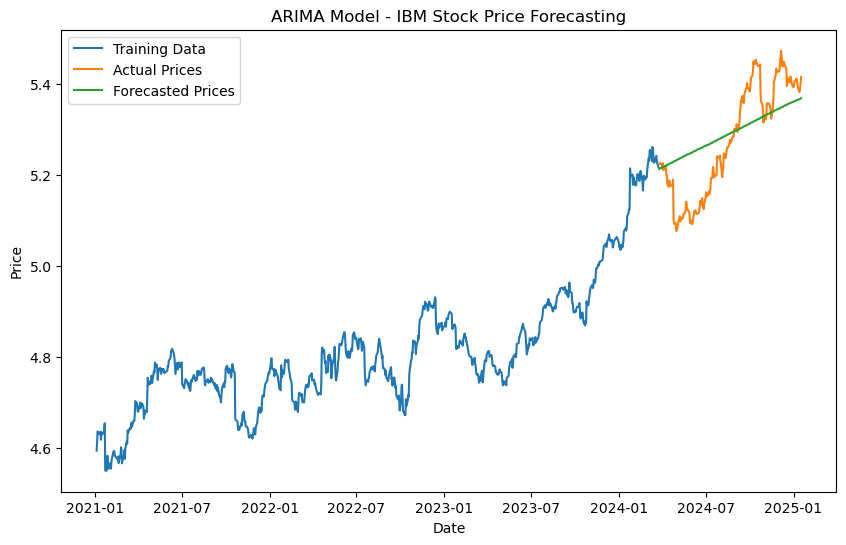

ANET - ARIMA Model Summary:
ANET - Mean Absolute Error: 0.05760749185422924
ANET - Root Mean Squared Error: 0.07470916574488352
ANET - Mean Absolute Percentage Error: 0.013019721251756202
ANET - R2 Score: 0.784587982714797


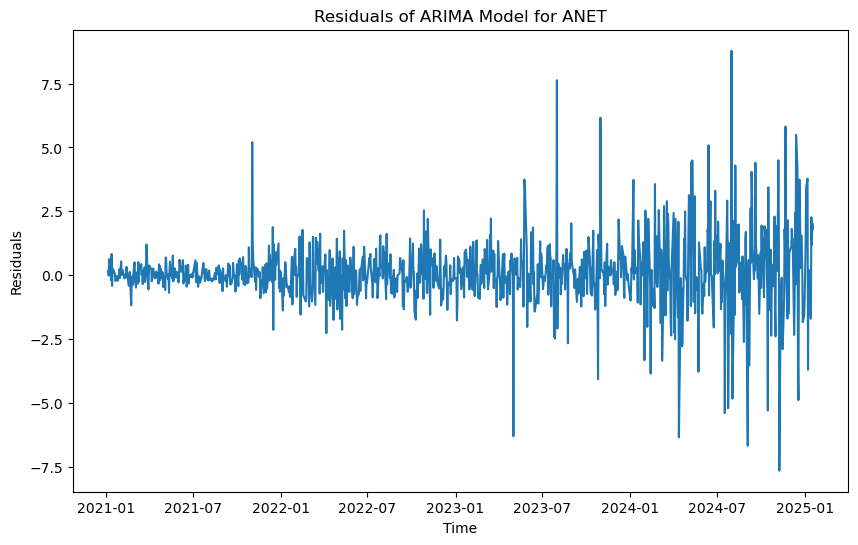

ANET Ljung-Box test: 0.016727084085794926
ANET ARCH-LM Test p-value: 9.158328016203876e-13
ANET Shapiro-Wilk Test p-value: 2.2323539996551003e-28


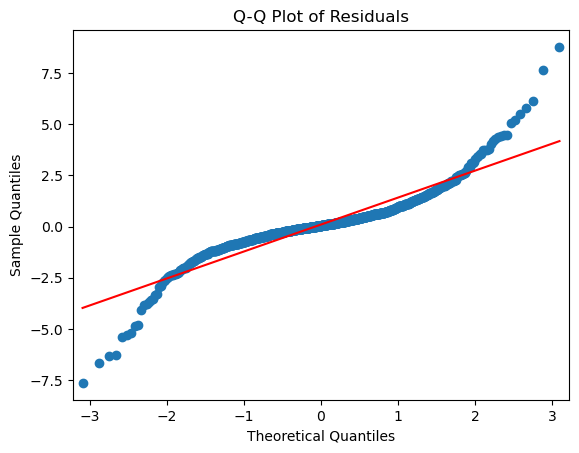

ANET: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 27808.339747534304
Iteration:      2,   Func. Count:     14,   Neg. LLF: 150092.59996445331
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1508.2874942504181
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1507.6322658493425
Iteration:      5,   Func. Count:     33,   Neg. LLF: 7025.310333689142
Iteration:      6,   Func. Count:     39,   Neg. LLF: 8101.564466007067
Iteration:      7,   Func. Count:     46,   Neg. LLF: 7244.297528624899
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6789515.965350204
Iteration:      9,   Func. Count:     60,   Neg. LLF: 7030.75284817579
Iteration:     10,   Func. Count:     66,   Neg. LLF: 1502.8256951880255
Iteration:     11,   Func. Count:     72,   Neg. LLF: 1468.521329243597
Iteration:     12,   Func. Count:     77,   Neg. LLF: 6290.149714091492
Iteration:     13,   Func. Count:     85,   Neg. LLF: 1555.41121

/opt/anaconda3/envs/proj/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


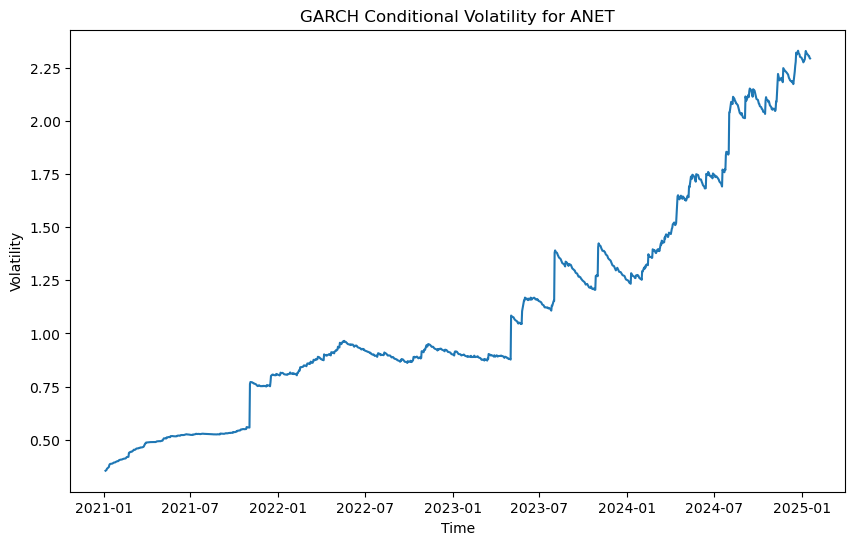

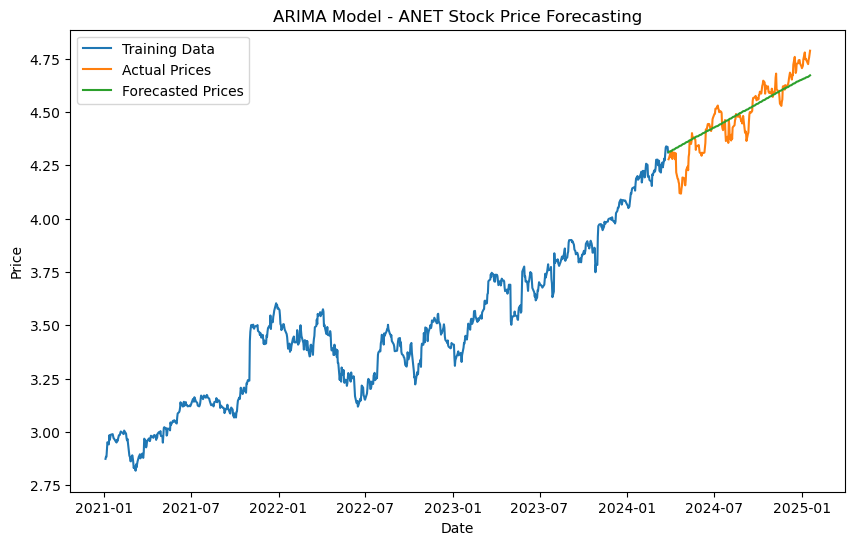

  Ticker ARIMA_Order       MAE      RMSE      MAPE        R2  Ljung-Box_p  \
0   MSFT   (2, 1, 2)  0.028060  0.036913  0.004627 -0.075523     0.978716   
1   NVDA   (0, 1, 0)  0.081736  0.096832  0.017259  0.681185     0.000109   
2  GOOGL   (0, 1, 0)  0.128726  0.146256  0.024866 -3.385944     0.342990   
3   AMZN   (0, 1, 0)  0.079670  0.108536  0.014969 -0.710150     0.489932   
4   META   (0, 1, 0)  0.095548  0.119065  0.015093 -0.519893     0.485829   
5    TSM   (0, 1, 0)  0.223696  0.255277  0.042920 -2.864099     0.013826   
6   ASML   (0, 1, 0)  0.161204  0.200365  0.024305 -0.907273     0.590351   
7   ADBE   (0, 1, 0)  0.068367  0.083147  0.011021 -0.012375     0.935246   
8    IBM   (0, 1, 0)  0.071640  0.085584  0.013668  0.499769     0.739389   
9   ANET   (0, 1, 0)  0.057607  0.074709  0.013020  0.784588     0.016727   

      ARCH-LM_p  Shapiro-Wilk_p  GARCH_Fit  GARCH_ARCH-LM_p  
0  6.423685e-01    1.153060e-08      False              NaN  
1  7.261366e-38    9.324531e

In [ ]:
%%time
from arch import arch_model

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.graphics.tsaplots import plot_acf

loged_data = np.log(data_df)
results = []

train_size = int(len(loged_data) * 0.8)
train, test = loged_data[:train_size], loged_data[train_size:]


for tick in tickers:
    # Auto ARIMA
    model = pm.auto_arima(train[tick], seasonal=False, stepwise=True, suppress_warnings=True)
    forecast = model.predict(len(test))

    # ARIMA evaluation
    arima_mae = mean_absolute_error(test[tick], forecast)
    arima_rmse = np.sqrt(mean_squared_error(test[tick], forecast))
    arima_mape = mean_absolute_percentage_error(test[tick], forecast)
    arima_r2 = r2_score(test[tick], forecast)


    print(f"{tick} - ARIMA Model Summary:")

    print(f"{tick} - Mean Absolute Error: {arima_mae}")
    print(f"{tick} - Root Mean Squared Error: {arima_rmse}")
    print(f"{tick} - Mean Absolute Percentage Error: {arima_mape}")
    print(f"{tick} - R2 Score: {arima_r2}")

    # ARIMA order
    p, d, q = model.order
    arima_model = ARIMA(data_df[tick], order=(p, d, q)).fit()
    resids = arima_model.resid[1:] # the first residual made some problem

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(resids)
    plt.title(f"Residuals of ARIMA Model for {tick}")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.show()

    # Diagnostic tests
    ljung = acorr_ljungbox(resids, lags=[10], return_df=True)
    print(f"{tick} Ljung-Box test: {ljung['lb_pvalue'].values[0]}")

    if ljung['lb_pvalue'].values[0]<.05 :
        print(f"{tick}: We reject the null hypothesis and significant autocorrelation detected.")

    else:
        print(f"{tick}: No significant autocorrelation detected.")

    ##############

    test_stat, arch_p_value, _, _ = het_arch(resids)
    print(f"{tick} ARCH-LM Test p-value: {arch_p_value}")

    if arch_p_value < 0.05:
        print(f"{tick}: Significant heteroscedasticity detected.")

    else:
        print(f"{tick}: No significant heteroscedasticity detected.")


    stat, shapiro_p = shapiro(resids)
    print(f"{tick} Shapiro-Wilk Test p-value: {shapiro_p}")
    if shapiro_p < 0.05:
        print(f"{tick}: The residuals do not follow a normal distribution.")
    else:
        print(f"{tick}: The residuals follow a normal distribution.")

    sm.qqplot(resids, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()

    result_dict = {
        "Ticker": tick,
        "ARIMA_Order": (p, d, q),
        "MAE": arima_mae,
        "RMSE": arima_rmse,
        "MAPE": arima_mape,
        "R2": arima_r2,
        "Ljung-Box_p": ljung['lb_pvalue'].values[0],
        "ARCH-LM_p": arch_p_value,
        "Shapiro-Wilk_p": shapiro_p
    }
    if arch_p_value < 0.05:
        print(f"{tick}: Significant heteroscedasticity detected. Fitting GARCH model.")


        garch_model = arch_model(resids, vol='Garch', p=1, q=1)
        garch_fit = garch_model.fit()
        print(garch_fit.summary())


        garch_residuals = garch_fit.std_resid


        test_stat, arch_p_value, _, _ = het_arch(garch_residuals)
        print(f"ARCH-LM Test p-value (GARCH residuals): {arch_p_value}")

        if arch_p_value < 0.05:
            print("Significant heteroscedasticity detected in GARCH residuals.")
        else:
            print("No significant heteroscedasticity detected in GARCH residuals.")

        result_dict.update({
            "GARCH_Fit": True,
            "GARCH_ARCH-LM_p": arch_p_value,
        })



        # Plot GARCH conditional variance
        plt.figure(figsize=(10, 6))
        plt.plot(garch_fit.conditional_volatility)
        plt.title(f"GARCH Conditional Volatility for {tick}")
        plt.xlabel("Time")
        plt.ylabel("Volatility")
        plt.show()
    else:
        result_dict.update({
            "GARCH_Fit": False,
            "GARCH_ARCH-LM_p": None,
        })
    results.append(result_dict)
    results_df = pd.DataFrame(results)

    # Forecast visualization
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train[tick], label='Training Data')
    plt.plot(test.index, test[tick], label='Actual Prices')
    plt.plot(test.index, forecast, label='Forecasted Prices', linestyle='-')
    plt.title(f"ARIMA Model - {tick} Stock Price Forecasting")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

print(results_df)



Based on the plots and the results, the predictions show fairly good results. we need to consider that the financial time series are very difficult to analysis with simple models like ARIMA and it's family models like SARIMAX and others. The GARCH model used to chek the heterosedastisity of those conpanies with the high heterosedastisity but not considered as the main objective of the analysis so, just mentiones for each company.

# DeepAR


The code to use DeepAR on the data is as below.

In [4]:
!nvidia-smi

Wed Jan 22 23:08:59 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
!pip install numpy==1.23.5
!pip install --upgrade mxnet
!pip install "gluonts[mxnet]"
!pip install optuna
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[I 2025-01-22 23:17:54,289] A new study created in memory with name: no-name-53ea438a-59ab-41bc-9d46-4610f6936733



==== Processing MSFT ====


100%|██████████| 50/50 [01:36<00:00,  1.93s/it, epoch=7/7, avg_epoch_loss=9.59]
[I 2025-01-22 23:29:26,575] Trial 0 finished with value: 412.64227294921875 and parameters: {'learning_rate': 0.00047660107936544927, 'num_layers': 3, 'num_cells': 40, 'dropout_rate': 0.4070864009294377, 'scaling': False, 'batch_size': 128, 'weight_decay': 1.1475599985350027e-05}. Best is trial 0 with value: 412.64227294921875.
100%|██████████| 50/50 [01:37<00:00,  1.95s/it, epoch=7/7, avg_epoch_loss=10.1]
[I 2025-01-22 23:41:01,092] Trial 1 finished with value: 419.25823974609375 and parameters: {'learning_rate': 0.0002927890214780999, 'num_layers': 3, 'num_cells': 40, 'dropout_rate': 0.2788196863993353, 'scaling': False, 'batch_size': 128, 'weight_decay': 1.7811155095419837e-07}. Best is trial 0 with value: 412.64227294921875.
100%|██████████| 50/50 [00:47<00:00,  1.04it/s, epoch=7/7, avg_epoch_loss=3.1]
[I 2025-01-22 23:46:38,519] Trial 2 finished with value: 63.971771240234375 and parameters: {'learning

Best params for MSFT: {'learning_rate': 0.0007415366582244813, 'num_layers': 1, 'num_cells': 20, 'dropout_rate': 0.38402654073289766, 'scaling': True, 'batch_size': 32, 'weight_decay': 4.963007911464999e-05}


100%|██████████| 50/50 [00:18<00:00,  2.66it/s, epoch=30/30, avg_epoch_loss=2.77]


Metrics for MSFT:
  MAE:  54.352480336782094
  RMSE: 58.60769638747569
  MAPE: 0.12763021084788934
  R^2:  -13.65290102493228


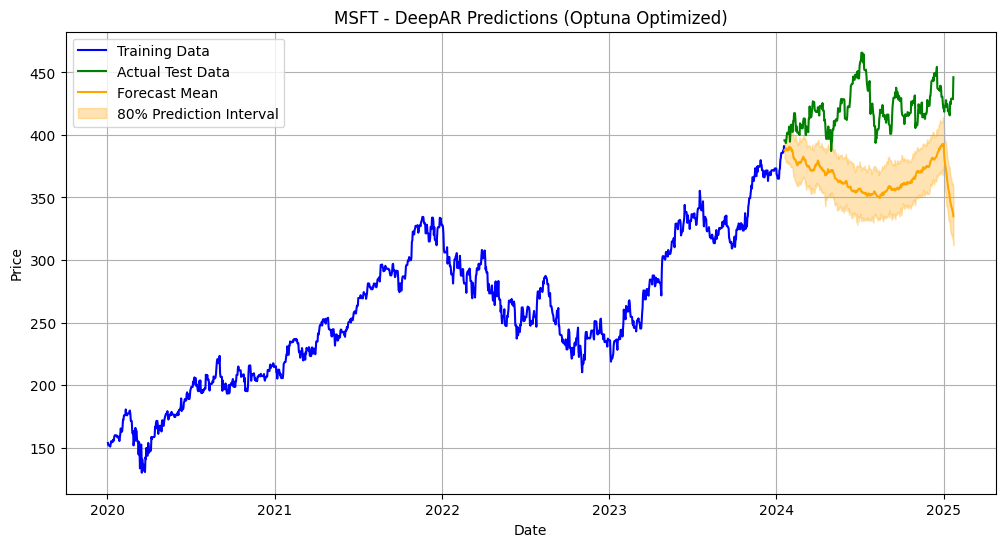

[I 2025-01-23 00:34:47,681] A new study created in memory with name: no-name-6ee8f434-6f9f-4acf-833e-2f88ddd977e8



==== Processing NVDA ====


100%|██████████| 50/50 [00:59<00:00,  1.20s/it, epoch=7/7, avg_epoch_loss=1.17]
[I 2025-01-23 00:41:59,031] Trial 0 finished with value: 92.0809326171875 and parameters: {'learning_rate': 0.004402169360672226, 'num_layers': 2, 'num_cells': 60, 'dropout_rate': 0.34429914494290426, 'scaling': False, 'batch_size': 64, 'weight_decay': 3.751225602717189e-05}. Best is trial 0 with value: 92.0809326171875.
100%|██████████| 50/50 [00:48<00:00,  1.03it/s, epoch=7/7, avg_epoch_loss=0.954]
[I 2025-01-23 00:47:46,217] Trial 1 finished with value: 53.08338165283203 and parameters: {'learning_rate': 0.000180263150387761, 'num_layers': 2, 'num_cells': 60, 'dropout_rate': 0.11075648267352318, 'scaling': True, 'batch_size': 32, 'weight_decay': 4.7105401286843416e-08}. Best is trial 1 with value: 53.08338165283203.
100%|██████████| 50/50 [00:21<00:00,  2.29it/s, epoch=7/7, avg_epoch_loss=3.55]
[I 2025-01-23 00:50:24,077] Trial 2 finished with value: 107.90158081054688 and parameters: {'learning_rate': 0

Best params for NVDA: {'learning_rate': 0.0004258726502137457, 'num_layers': 1, 'num_cells': 40, 'dropout_rate': 0.19081529047608187, 'scaling': True, 'batch_size': 128, 'weight_decay': 3.425568739566719e-05}


100%|██████████| 50/50 [00:36<00:00,  1.39it/s, epoch=30/30, avg_epoch_loss=0.479]


Metrics for NVDA:
  MAE:  76.8421925183889
  RMSE: 84.0141123196694
  MAPE: 0.6446743601368147
  R^2:  -10.571599133190043


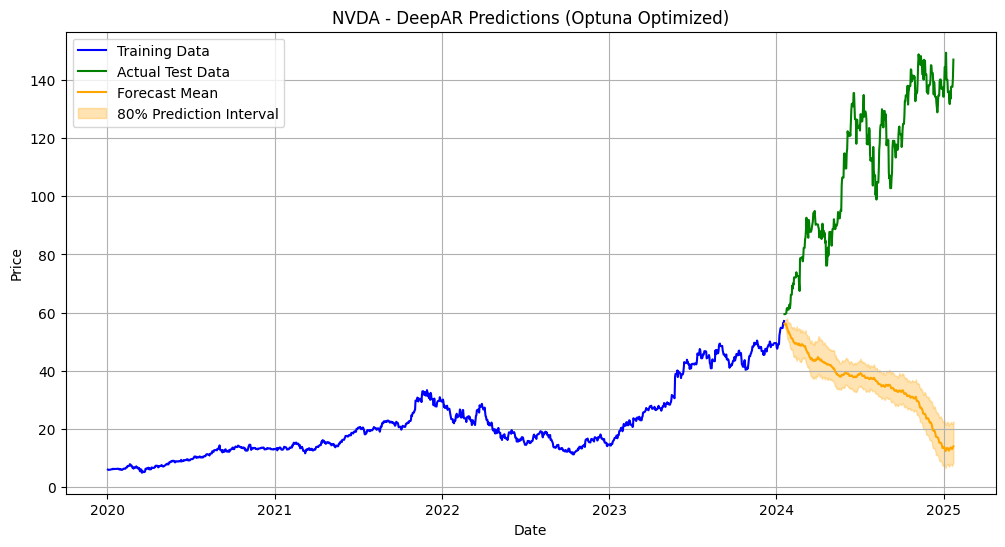

[I 2025-01-23 01:58:27,754] A new study created in memory with name: no-name-30e57164-b254-4fba-8c28-f30715d971f7



==== Processing GOOGL ====


100%|██████████| 50/50 [00:52<00:00,  1.06s/it, epoch=7/7, avg_epoch_loss=2.45]
[I 2025-01-23 02:04:44,999] Trial 0 finished with value: 23.86783218383789 and parameters: {'learning_rate': 0.0004622644490328397, 'num_layers': 2, 'num_cells': 40, 'dropout_rate': 0.39124499707451255, 'scaling': True, 'batch_size': 64, 'weight_decay': 2.092371878980255e-08}. Best is trial 0 with value: 23.86783218383789.
100%|██████████| 50/50 [00:21<00:00,  2.30it/s, epoch=7/7, avg_epoch_loss=2.35]
[I 2025-01-23 02:07:20,373] Trial 1 finished with value: 11.998231887817383 and parameters: {'learning_rate': 0.0028457339730520825, 'num_layers': 1, 'num_cells': 40, 'dropout_rate': 0.17311901343338904, 'scaling': True, 'batch_size': 32, 'weight_decay': 7.10946193630516e-05}. Best is trial 1 with value: 11.998231887817383.
100%|██████████| 50/50 [01:23<00:00,  1.67s/it, epoch=7/7, avg_epoch_loss=7.85]
[I 2025-01-23 02:17:11,546] Trial 2 finished with value: 165.3994903564453 and parameters: {'learning_rate': 

Best params for GOOGL: {'learning_rate': 0.0028457339730520825, 'num_layers': 1, 'num_cells': 40, 'dropout_rate': 0.17311901343338904, 'scaling': True, 'batch_size': 32, 'weight_decay': 7.10946193630516e-05}


100%|██████████| 50/50 [00:22<00:00,  2.25it/s, epoch=30/30, avg_epoch_loss=1.88]


Metrics for GOOGL:
  MAE:  22.722437142037055
  RMSE: 28.882765461272577
  MAPE: 0.13230503749433276
  R^2:  -2.2925725920165663


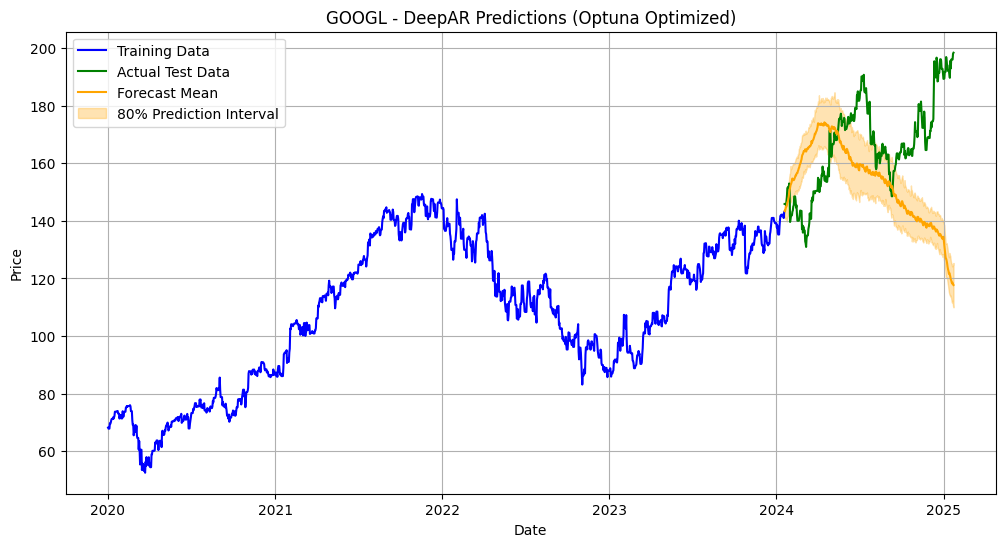

[I 2025-01-23 03:08:19,321] A new study created in memory with name: no-name-d37d9485-aec1-4f6f-818b-4125b461d8d8



==== Processing AMZN ====


100%|██████████| 50/50 [01:06<00:00,  1.33s/it, epoch=7/7, avg_epoch_loss=2.94]
[I 2025-01-23 03:15:59,323] Trial 0 finished with value: 14.490374565124512 and parameters: {'learning_rate': 0.0002864191158793869, 'num_layers': 3, 'num_cells': 40, 'dropout_rate': 0.17489361586354785, 'scaling': True, 'batch_size': 32, 'weight_decay': 4.928158977174098e-07}. Best is trial 0 with value: 14.490374565124512.
100%|██████████| 50/50 [00:26<00:00,  1.87it/s, epoch=7/7, avg_epoch_loss=2.79]
[I 2025-01-23 03:19:07,717] Trial 1 finished with value: 59.159339904785156 and parameters: {'learning_rate': 0.000525699091816701, 'num_layers': 1, 'num_cells': 60, 'dropout_rate': 0.4413677097518308, 'scaling': True, 'batch_size': 32, 'weight_decay': 6.789805269363931e-08}. Best is trial 0 with value: 14.490374565124512.
100%|██████████| 50/50 [00:31<00:00,  1.61it/s, epoch=7/7, avg_epoch_loss=9.65]
[I 2025-01-23 03:22:54,273] Trial 2 finished with value: 185.46279907226562 and parameters: {'learning_rate'

Best params for AMZN: {'learning_rate': 0.0002864191158793869, 'num_layers': 3, 'num_cells': 40, 'dropout_rate': 0.17489361586354785, 'scaling': True, 'batch_size': 32, 'weight_decay': 4.928158977174098e-07}


100%|██████████| 50/50 [01:02<00:00,  1.24s/it, epoch=30/30, avg_epoch_loss=2.54]


Metrics for AMZN:
  MAE:  37.71630578943201
  RMSE: 43.48243095169382
  MAPE: 0.19188543508910005
  R^2:  -4.931221013095758


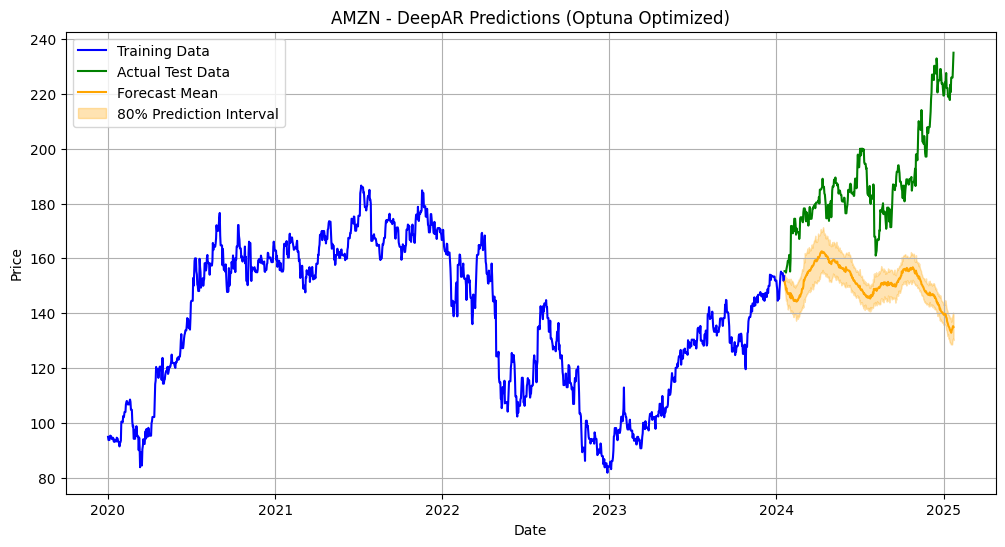

[I 2025-01-23 04:39:05,628] A new study created in memory with name: no-name-011782f4-b012-4967-b6c0-5582f9403b8f



==== Processing META ====


100%|██████████| 50/50 [01:59<00:00,  2.39s/it, epoch=7/7, avg_epoch_loss=8.49]
[I 2025-01-23 04:53:33,762] Trial 0 finished with value: 483.58514404296875 and parameters: {'learning_rate': 0.0006213904353558286, 'num_layers': 3, 'num_cells': 60, 'dropout_rate': 0.10724514090206974, 'scaling': False, 'batch_size': 128, 'weight_decay': 2.2833796928237525e-07}. Best is trial 0 with value: 483.58514404296875.
100%|██████████| 50/50 [00:19<00:00,  2.53it/s, epoch=7/7, avg_epoch_loss=11.9]
[I 2025-01-23 04:55:54,726] Trial 1 finished with value: 516.0892333984375 and parameters: {'learning_rate': 0.0014250103385642933, 'num_layers': 1, 'num_cells': 20, 'dropout_rate': 0.42042262393480934, 'scaling': False, 'batch_size': 32, 'weight_decay': 1.4454012995034118e-05}. Best is trial 0 with value: 483.58514404296875.
100%|██████████| 50/50 [00:38<00:00,  1.31it/s, epoch=7/7, avg_epoch_loss=11.4]
[I 2025-01-23 05:00:19,495] Trial 2 finished with value: 512.26611328125 and parameters: {'learning_ra

Best params for META: {'learning_rate': 0.0037120202647971095, 'num_layers': 3, 'num_cells': 40, 'dropout_rate': 0.3337464249640134, 'scaling': True, 'batch_size': 64, 'weight_decay': 2.932360187156647e-05}


100%|██████████| 50/50 [01:18<00:00,  1.57s/it, epoch=30/30, avg_epoch_loss=3.03]


Metrics for META:
  MAE:  210.2778182158599
  RMSE: 225.02255676364933
  MAPE: 0.39160617525081726
  R^2:  -14.754793499502364


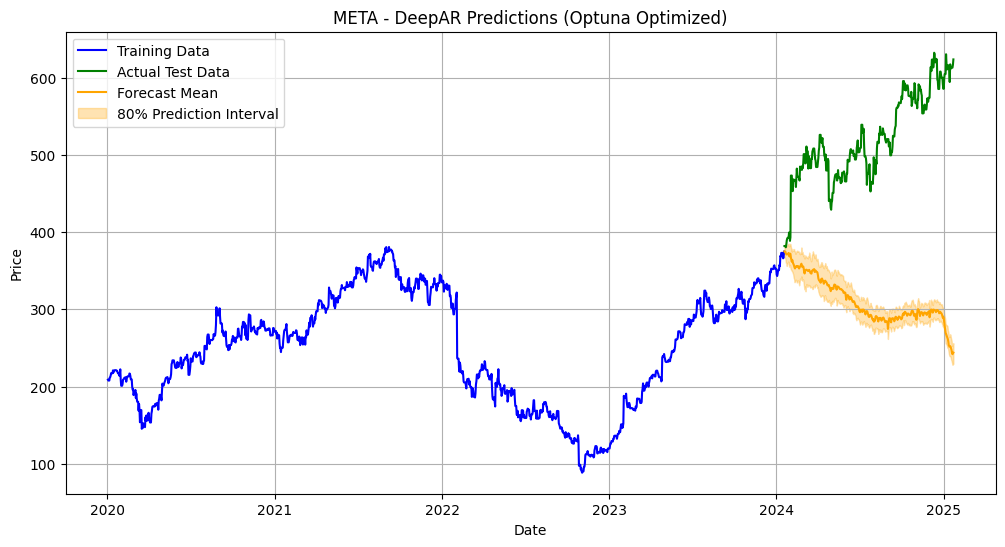

[I 2025-01-23 06:29:42,759] A new study created in memory with name: no-name-3eefdce5-e3ef-42f3-a97f-b88077250683



==== Processing TSM ====


100%|██████████| 50/50 [00:24<00:00,  2.03it/s, epoch=7/7, avg_epoch_loss=2.33]
[I 2025-01-23 06:32:40,849] Trial 0 finished with value: 21.018190383911133 and parameters: {'learning_rate': 0.004727625338659154, 'num_layers': 1, 'num_cells': 60, 'dropout_rate': 0.2014505251165505, 'scaling': True, 'batch_size': 32, 'weight_decay': 6.717190865630672e-06}. Best is trial 0 with value: 21.018190383911133.
100%|██████████| 50/50 [00:19<00:00,  2.52it/s, epoch=7/7, avg_epoch_loss=2.67]
[I 2025-01-23 06:35:04,258] Trial 1 finished with value: 51.506629943847656 and parameters: {'learning_rate': 0.000281713922392006, 'num_layers': 1, 'num_cells': 20, 'dropout_rate': 0.18796842155874904, 'scaling': True, 'batch_size': 32, 'weight_decay': 2.5260849147145267e-05}. Best is trial 0 with value: 21.018190383911133.
100%|██████████| 50/50 [00:22<00:00,  2.21it/s, epoch=7/7, avg_epoch_loss=9.31]
[I 2025-01-23 06:37:45,788] Trial 2 finished with value: 164.54266357421875 and parameters: {'learning_rate'

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import optuna

from gluonts.dataset.common import ListDataset
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

#from mxnet.contrib import amp
#amp.init()


# --------------------------
# 1) Data Download & Prep
# --------------------------
def download_data(tickers, start):
    data = pd.DataFrame()
    for ticker in tickers:
        print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data = pd.concat([data, df['Close']], axis=1)
    data.columns = tickers
    return data

# --------------------------
# 2) Optuna Objective
# --------------------------

def objective(trial, training_data, testing_data, prediction_length, freq):

    context_length = prediction_length
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    num_cells = trial.suggest_categorical("num_cells", [20, 40, 60])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)

    scaling = trial.suggest_categorical("scaling", [True, False])
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    weight_decay = trial.suggest_float("weight_decay", 1e-8, 1e-4, log=True)


    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        freq=freq,
        context_length=context_length,
        num_layers=num_layers,
        num_cells=num_cells,
        dropout_rate=dropout_rate,

        scaling=scaling,
        batch_size=batch_size,
        trainer=Trainer(
            epochs=7,
            learning_rate=learning_rate,
            weight_decay=weight_decay,
        ),

    )


    predictor = estimator.train(training_data)


    forecast_it, ts_it = make_evaluation_predictions(
        dataset=testing_data,
        predictor=predictor,
        num_samples=100
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)


    forecast_mean = forecasts[0].mean
    actual_values = tss[0][-prediction_length:]


    mae = mean_absolute_error(actual_values, forecast_mean)
    return mae

# --------------------------
# 3) Main Execution (All in One)
# --------------------------

#tickers = ["NVDA"]
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM", "ASML", "ADBE", "IBM", "ANET"]

start_date = "2020-01-01"


data_df = download_data(tickers, start_date)
data_df.index = pd.to_datetime(data_df.index)


data_df = data_df.ffill().dropna()
data_df = data_df.asfreq('D')
data_df = data_df.ffill()


train_ratio = 0.8
split_index = int(len(data_df) * train_ratio)
freq = "D"


#prediction_length = len(test_series)


results = []

for ticker in data_df.columns:
    print(f"\n==== Processing {ticker} ====")


    train_series = data_df.iloc[:split_index][ticker]
    test_series = data_df.iloc[split_index:][ticker]
    full_series = data_df[ticker]
    prediction_length = len(test_series)

    training_data = ListDataset(
        [{"start": train_series.index[0], "target": train_series.values}],
        freq=freq
    )
    testing_data = ListDataset(
        [{"start": full_series.index[0], "target": full_series.values}],
        freq=freq
    )

    # -----------------------------------
    # 4) Hyperparameter Optimization
    # -----------------------------------

    study = optuna.create_study(direction="minimize")
    study.optimize(
        lambda trial: objective(trial, training_data, testing_data, prediction_length, freq),
        n_trials= 10,
        #n_jobs=-1
    )

    best_params = study.best_params
    print(f"Best params for {ticker}: {best_params}")

    # -----------------------------------
    # 5) Train Final Model
    # -----------------------------------

    final_estimator = DeepAREstimator(
    prediction_length=prediction_length,
    freq=freq,
    context_length=prediction_length,
    num_layers=best_params["num_layers"],
    num_cells=best_params["num_cells"],
    dropout_rate=best_params["dropout_rate"],
    scaling=best_params["scaling"],
    batch_size=best_params["batch_size"],
    trainer=Trainer(
        epochs=30,
        learning_rate=best_params["learning_rate"],
        weight_decay=best_params["weight_decay"],
        #checkpoint_path="checkpoints", ###
        #checkpoint_freq=10
    ),

)
    final_predictor = final_estimator.train(training_data)

    # -----------------------------------
    # 6) Forecast & Evaluate
    # -----------------------------------

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=testing_data,
        predictor=final_predictor,
        num_samples=100,

    )
    forecasts = list(forecast_it)
    tss = list(ts_it)

    forecast_mean = forecasts[0].mean[-prediction_length:]
    actual_values = test_series.iloc[:prediction_length].values

    mae = mean_absolute_error(actual_values, forecast_mean)
    rmse = np.sqrt(mean_squared_error(actual_values, forecast_mean))
    mape = mean_absolute_percentage_error(actual_values, forecast_mean)
    r2 = r2_score(actual_values, forecast_mean)

    print(f"Metrics for {ticker}:")
    print(f"  MAE:  {mae}")
    print(f"  RMSE: {rmse}")
    print(f"  MAPE: {mape}")
    print(f"  R^2:  {r2}")

    results.append({
        "Ticker": ticker,
        "Best Params": best_params,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    })

    # -----------------------------------
    # 7) Plot the Forecast
    # -----------------------------------
    plt.figure(figsize=(12, 6))
    plt.plot(train_series.index, train_series.values, label="Training Data", color="blue")
    plt.plot(test_series.index, test_series.values, label="Actual Test Data", color="green")

    forecast_index = test_series.index[:prediction_length]
    plt.plot(forecast_index, forecast_mean, color="orange", label="Forecast Mean")

    plt.fill_between(
        forecast_index,
        forecasts[0].quantile(0.1)[-prediction_length:],
        forecasts[0].quantile(0.9)[-prediction_length:],
        color="orange",
        alpha=0.3,
        label="80% Prediction Interval"
    )

    plt.title(f"{ticker} - DeepAR Predictions (Optuna Optimized)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# --------------------------
# 8) Results Summary
# --------------------------

results_df = pd.DataFrame(results)
print("\n=== Summary of Results ===")
print(results_df)

In [ ]:
result_df_deepar= pd.DataFrame(results)
print("\n=== Summary of Results ===")
print(result_df_deepar)

# LSTM and BiLSTM

In [ ]:
%%time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import yfinance as yf


# To use TPU i had to add this piece of code :

import tensorflow as tf

# Detect and init the TPU
# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
#     print('Running on TPU ', tpu.master())
# except ValueError:
#     raise BaseException('ERROR: Not connected to a TPU runtime; please follow the instructions above!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.TPUStrategy(tpu)


def download_data(tickers, start):
    data = pd.DataFrame()
    for ticker in tickers:
        print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data = pd.concat([data, df['Close']], axis=1)
    data.columns = tickers
    return data

# Tickers
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META",
           "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = "2021-01-01"

# Download & preprocess
data_df = download_data(tickers, start_date)
data_df.index = pd.to_datetime(data_df.index)
data_df = data_df.ffill().dropna()
data_df = data_df.asfreq('D')
data_df = data_df.ffill()

# Very common sequence_length :30
sequence_length = 30

def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

def objective_lstm(trial):

    results = []

    for ticker in data_df.columns:
        values = data_df[ticker].values.reshape(-1, 1)
        train_size = int(len(values) * 0.8)
        train_data_raw = values[:train_size]
        test_data_raw = values[train_size:]

        scaler = MinMaxScaler()
        scaler.fit(train_data_raw)
        train_data = scaler.transform(train_data_raw)
        test_data = scaler.transform(test_data_raw)

        X_train, y_train = create_sequences(train_data, sequence_length)
        X_test, y_test = create_sequences(test_data, sequence_length)

        # Suggested hyperparams
        units = trial.suggest_int("units", 32, 128)
        learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
        batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
        dropout_rate = trial.suggest_float("dropout", 0.1, 0.5)

        # LSTM
        #with tpu_strategy.scope():
        model = Sequential([
              LSTM(units, return_sequences=True, input_shape=(sequence_length, 1), dropout=dropout_rate),
              LSTM(units, return_sequences=False, dropout=dropout_rate),

              Dense(1)
          ])

        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')


        model.fit(X_train, y_train, epochs=5, batch_size=batch_size,
                  verbose=0, validation_data=(X_test, y_test))

        # Predict
        predictions = model.predict(X_test)
        predictions = scaler.inverse_transform(predictions)
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Evaluate
        mae = mean_absolute_error(y_test_actual, predictions)
        results.append(mae)

    return np.mean(results)

def objective_bilstm(trial):

    results = []

    for ticker in data_df.columns:
        values = data_df[ticker].values.reshape(-1, 1)
        train_size = int(len(values) * 0.8)
        train_data_raw = values[:train_size]
        test_data_raw = values[train_size:]

        scaler = MinMaxScaler()
        scaler.fit(train_data_raw)
        train_data = scaler.transform(train_data_raw)
        test_data = scaler.transform(test_data_raw)

        X_train, y_train = create_sequences(train_data, sequence_length)
        X_test, y_test = create_sequences(test_data, sequence_length)


        units = trial.suggest_int("units", 32, 128)
        learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
        batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
        dropout_rate = trial.suggest_float("dropout", 0.1, 0.5)

        # BiLSTM
        #with tpu_strategy.scope():
        model = Sequential([
              Bidirectional(LSTM(units, return_sequences=True, dropout=dropout_rate), input_shape=(sequence_length, 1)),
              Bidirectional(LSTM(units, return_sequences=False, dropout=dropout_rate)),
              Dense(1)
          ])

        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')


        model.fit(X_train, y_train, epochs=7, batch_size=batch_size,
                  verbose=0, validation_data=(X_test, y_test))

        # Predict
        predictions = model.predict(X_test)
        predictions = scaler.inverse_transform(predictions)
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


        mae = mean_absolute_error(y_test_actual, predictions)
        results.append(mae)

    return np.mean(results)

# LSTM
lstm_study = optuna.create_study(direction="minimize")
lstm_study.optimize(objective_lstm, n_trials=5)

# BiLSTM
bilstm_study = optuna.create_study(direction="minimize")
bilstm_study.optimize(objective_bilstm, n_trials=5)

# Best parameters
print("Best LSTM Parameters:", lstm_study.best_params)
print("Best BiLSTM Parameters:", bilstm_study.best_params)

def evaluate_model_for_all(model_type, best_params, tickers, data_df, sequence_length=30):

    results = []

    for ticker in tickers:


        values = data_df[ticker].values.reshape(-1, 1)
        train_size = int(len(values) * 0.8)
        train_data_raw = values[:train_size]
        test_data_raw = values[train_size:]

        scaler = MinMaxScaler()
        scaler.fit(train_data_raw)
        train_data = scaler.transform(train_data_raw)
        test_data = scaler.transform(test_data_raw)

        X_train, y_train = create_sequences(train_data, sequence_length)
        X_test, y_test = create_sequences(test_data, sequence_length)



        # model
        #with tpu_strategy.scope():
        model = Sequential()
        if model_type == 'LSTM':
              model.add(LSTM(best_params['units'], return_sequences=True,
                            input_shape=(sequence_length, 1),
                            dropout=best_params['dropout']))

              model.add(LSTM(best_params['units'], return_sequences=False,
                            dropout=best_params['dropout']))
        else: # BiLSTM
              model.add(Bidirectional(LSTM(best_params['units'], return_sequences=True,
                            dropout=best_params['dropout']), input_shape=(sequence_length, 1)))

              model.add(Bidirectional(LSTM(best_params['units'], return_sequences=False,
                                          dropout=best_params['dropout'])))

        model.add(Dense(1))

        model.compile( optimizer=Adam( learning_rate=best_params['learning_rate']) , loss='mean_squared_error')


        # Train
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train,
                  epochs=25,
                  batch_size=best_params['batch_size'],
                  validation_data=(X_test, y_test),
                  callbacks=[early_stop],
                  verbose=0)

        # Predict
        predictions = model.predict(X_test)
        predictions = scaler.inverse_transform(predictions)
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Metrics
        mae  = mean_absolute_error(y_test_actual, predictions)
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
        mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
        r2   = r2_score(y_test_actual, predictions)

        results.append({
            'Ticker': ticker,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse,
            'R2': r2
        })

        # Plot
        test_dates = data_df.index[train_size + sequence_length:
                                   train_size + sequence_length + len(y_test_actual)]
        plt.figure(figsize=(10, 5))
        plt.plot(test_dates, y_test_actual, label='Actual')
        plt.plot(test_dates, predictions, label='Predicted', alpha=0.7)
        plt.title(f'{model_type} | {ticker} - Actual vs Predicted')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()


    return pd.DataFrame(results)

# LSTM
results_lstm_df = evaluate_model_for_all('LSTM', lstm_study.best_params, tickers, data_df, sequence_length)
print("\n===== Final LSTM Results =====")
print(results_lstm_df)

# BiLSTM
results_bilstm_df = evaluate_model_for_all('BiLSTM', bilstm_study.best_params, tickers, data_df, sequence_length)
print("\n===== Final BiLSTM Results =====")
print(results_bilstm_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[I 2025-01-24 01:01:08,944] A new study created in memory with name: no-name-74b9db1e-eef5-4801-9302-9cef6e95e040


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-01-24 01:02:54,302] Trial 0 finished with value: 84.15087691771832 and parameters: {'units': 93, 'learning_rate': 0.0006151826609607596, 'batch_size': 16, 'dropout': 0.41820867297726483}. Best is trial 0 with value: 84.15087691771832.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-24 01:04:34,370] Trial 1 finished with value: 77.8497367982623 and parameters: {'units': 103, 'learning_rate': 0.0015378654688672567, 'batch_size': 16, 'dropout': 0.380487415953893}. Best is trial 1 with value: 77.8497367982623.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-24 01:05:40,867] Trial 2 finished with value: 53.12949844960925 and parameters: {'units': 100, 'learning_rate': 0.00404883878826392, 'batch_size': 32, 'dropout': 0.23444215714601785}. Best is trial 2 with value: 53.12949844960925.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-24 01:06:49,083] Trial 3 finished with value: 94.86697904905186 and parameters: {'units': 105, 'learning_rate': 0.00016031745627677647, 'batch_size': 32, 'dropout': 0.44369422736992914}. Best is trial 2 with value: 53.12949844960925.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-01-24 01:08:28,616] Trial 4 finished with value: 91.43751851207095 and parameters: {'units': 63, 'learning_rate': 0.0002996215036751643, 'batch_size': 16, 'dropout': 0.4528353247827557}. Best is trial 2 with value: 53.12949844960925.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [2]:
!pip install prophet yfinance optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


Streaming output truncated to the last 5000 lines.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/1brbgmx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46479', 'data', 'file=/tmp/tmpvu4y2zti/_9jr2635.json', 'init=/tmp/tmpvu4y2zti/1brbgmx7.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_modelpf8zy86_/prophet_model-20250124170058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/uymrg5z2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/2m96sngf.json
DEBUG:cmdstanpy:idx 0
DEBUG:

Best Parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.4778563446133939, 'seasonality_prior_scale': 3.1303400981224345, 'holidays_prior_scale': 9.520906659846402}
Processing MSFT...


17:11:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


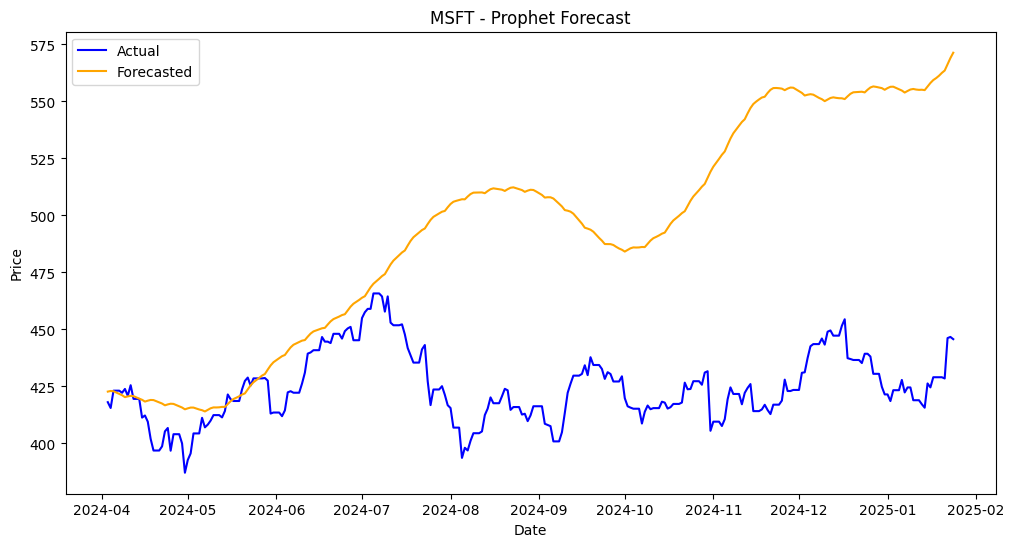

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/ejqi1vf7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/lpgvy1mi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94799', 'data', 'file=/tmp/tmpvu4y2zti/ejqi1vf7.json', 'init=/tmp/tmpvu4y2zti/lpgvy1mi.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_modelrhgibcli/prophet_model-20250124171154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing NVDA...


17:11:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


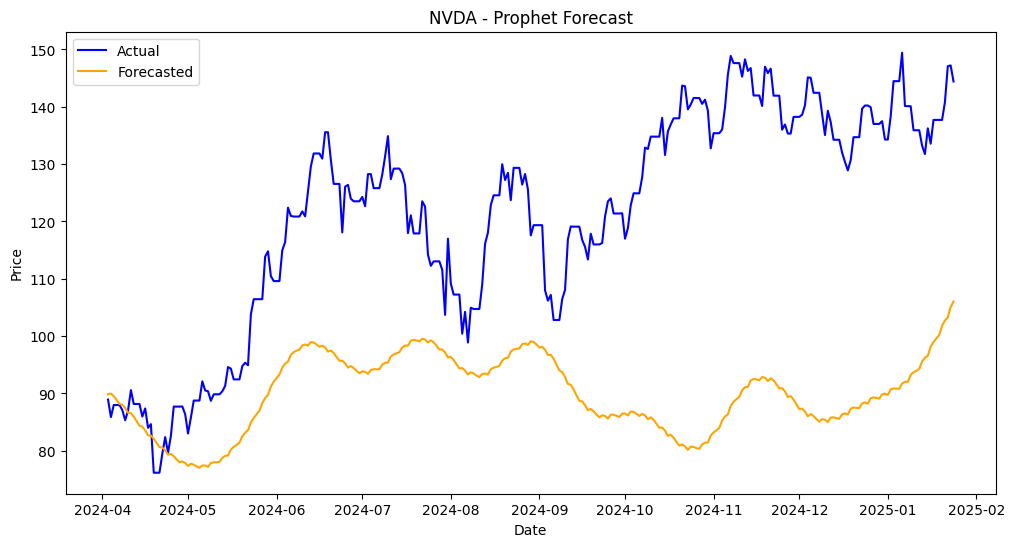

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/l5kycpj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/4tgegkj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23406', 'data', 'file=/tmp/tmpvu4y2zti/l5kycpj8.json', 'init=/tmp/tmpvu4y2zti/4tgegkj7.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_modelnbgm34i_/prophet_model-20250124171157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing GOOGL...


17:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


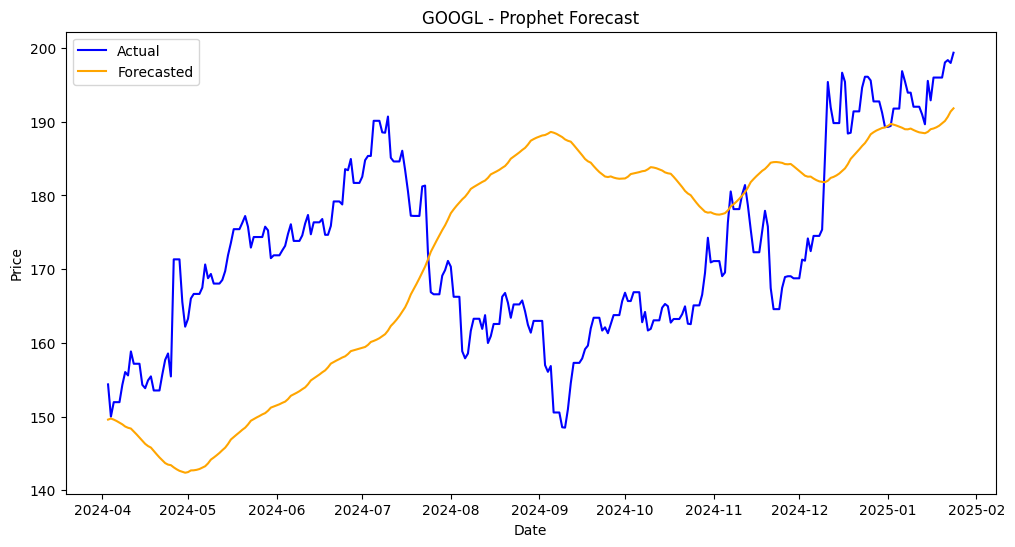

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/aaxdh11o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/fnupgupc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88107', 'data', 'file=/tmp/tmpvu4y2zti/aaxdh11o.json', 'init=/tmp/tmpvu4y2zti/fnupgupc.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_model4crv3wa3/prophet_model-20250124171159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing AMZN...


17:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


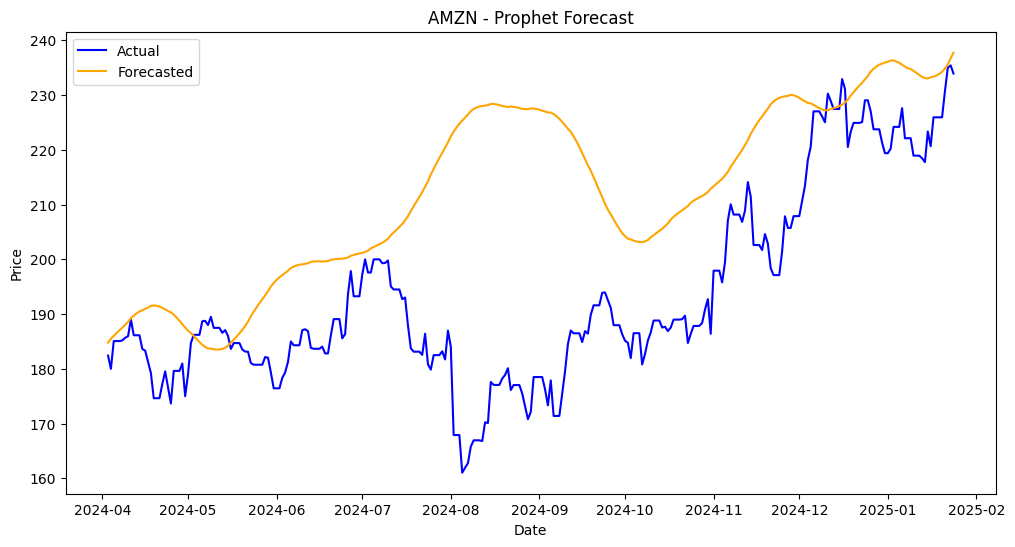

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/ykeocoye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/w6_p3t8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88930', 'data', 'file=/tmp/tmpvu4y2zti/ykeocoye.json', 'init=/tmp/tmpvu4y2zti/w6_p3t8x.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_model2aabpbb7/prophet_model-20250124171201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:12:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing META...


17:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


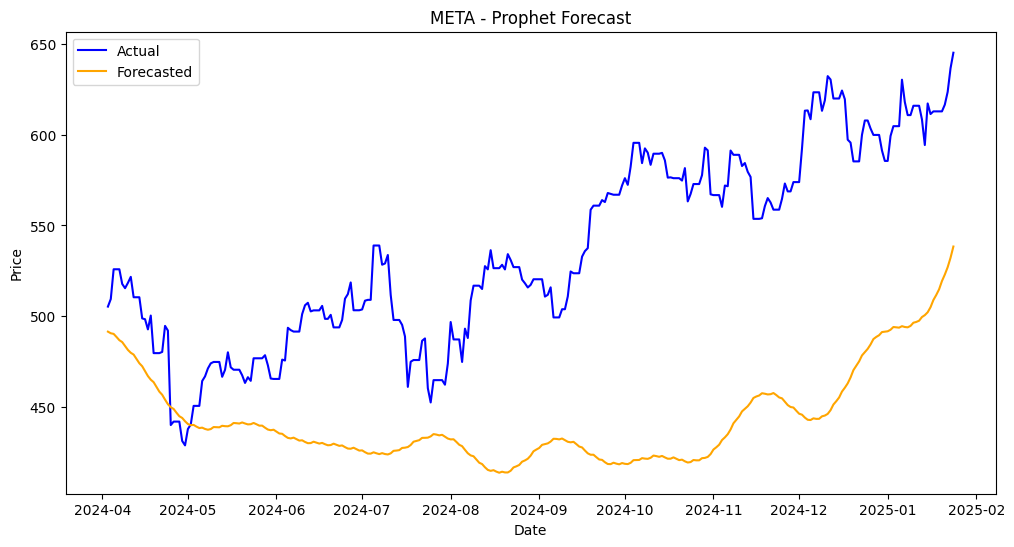

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/z4csue2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/fhhgmi_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93603', 'data', 'file=/tmp/tmpvu4y2zti/z4csue2f.json', 'init=/tmp/tmpvu4y2zti/fhhgmi_b.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_model8tsdp2ai/prophet_model-20250124171203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:12:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing TSM...


17:12:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


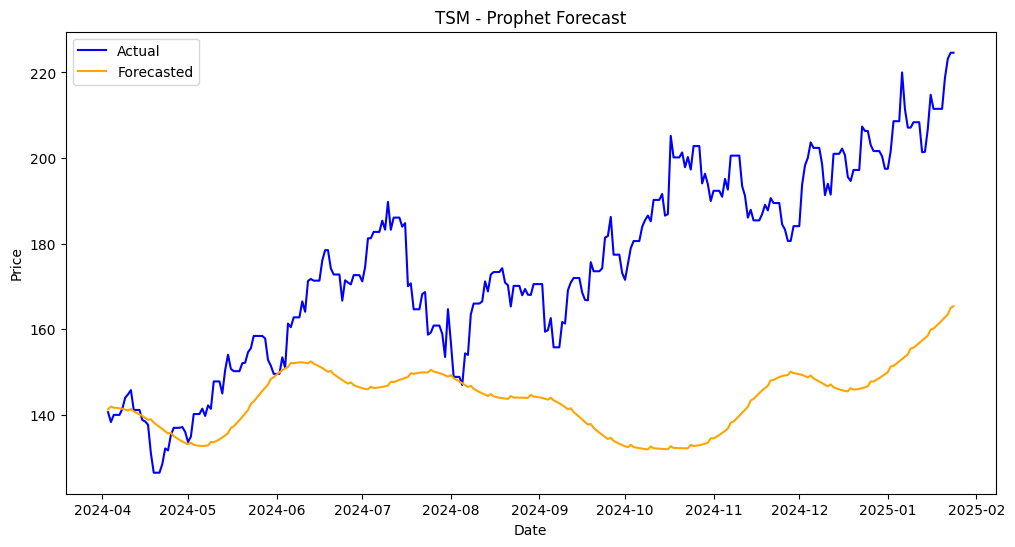

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/ejep5b1y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/lt2wt6mt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21964', 'data', 'file=/tmp/tmpvu4y2zti/ejep5b1y.json', 'init=/tmp/tmpvu4y2zti/lt2wt6mt.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_modeld_64i8_z/prophet_model-20250124171204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ASML...


17:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


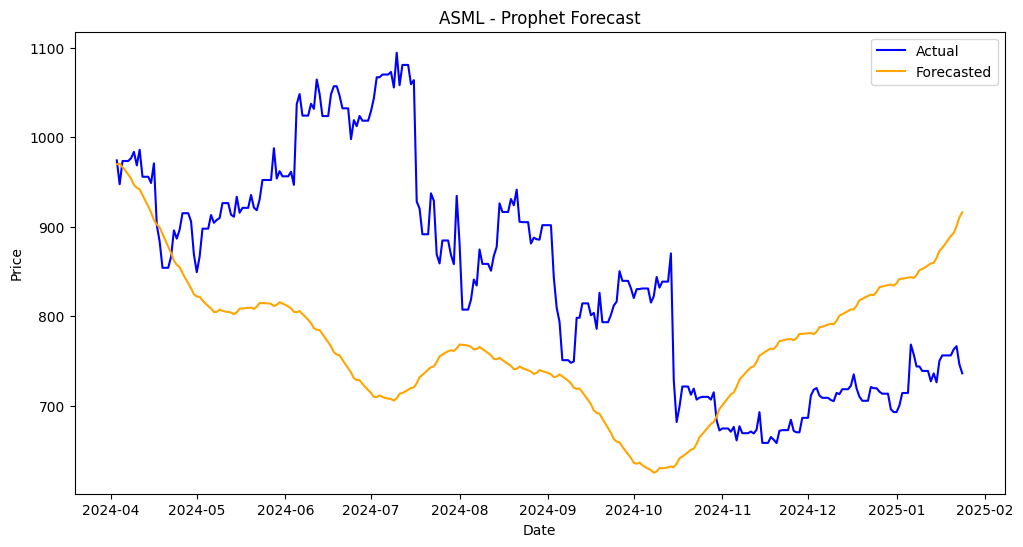

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/pvhdhth7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/rtb945hu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31805', 'data', 'file=/tmp/tmpvu4y2zti/pvhdhth7.json', 'init=/tmp/tmpvu4y2zti/rtb945hu.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_model_b2n6_jv/prophet_model-20250124171206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:12:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ADBE...


17:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


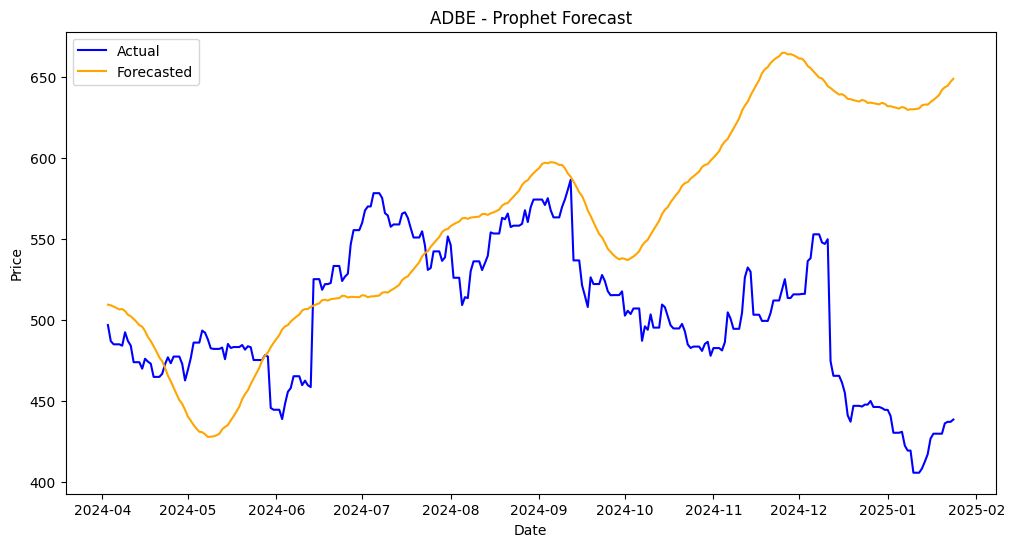

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/5pfl53lh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/o_qdgsr8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59275', 'data', 'file=/tmp/tmpvu4y2zti/5pfl53lh.json', 'init=/tmp/tmpvu4y2zti/o_qdgsr8.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_modeld3td4755/prophet_model-20250124171208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:12:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing IBM...


17:12:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


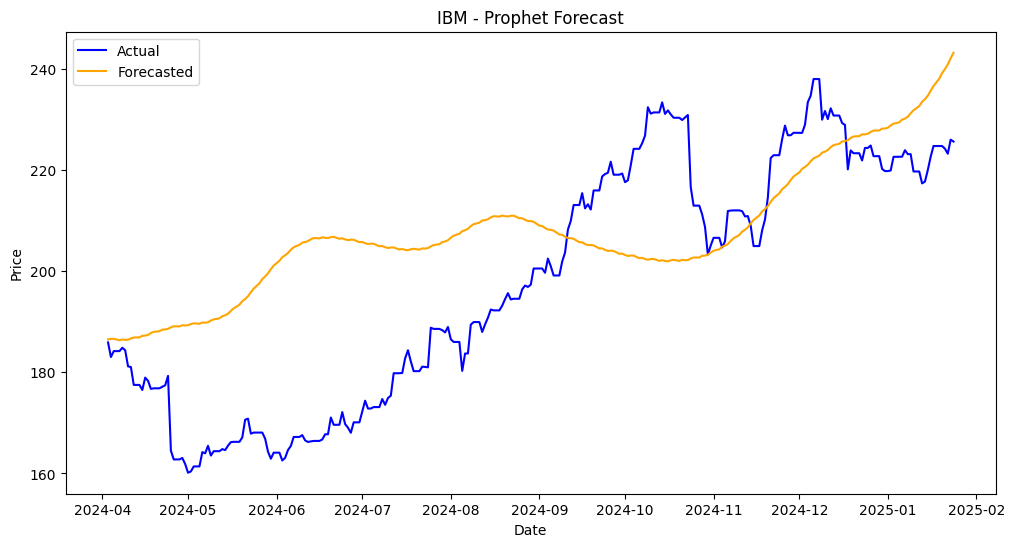

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/_odv6rd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvu4y2zti/3kl2d1yd.json
DEBUG:cmdstanpy:idx 0


Processing ANET...


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71790', 'data', 'file=/tmp/tmpvu4y2zti/_odv6rd5.json', 'init=/tmp/tmpvu4y2zti/3kl2d1yd.json', 'output', 'file=/tmp/tmpvu4y2zti/prophet_modelw4bdi55e/prophet_model-20250124171210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:12:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:12:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


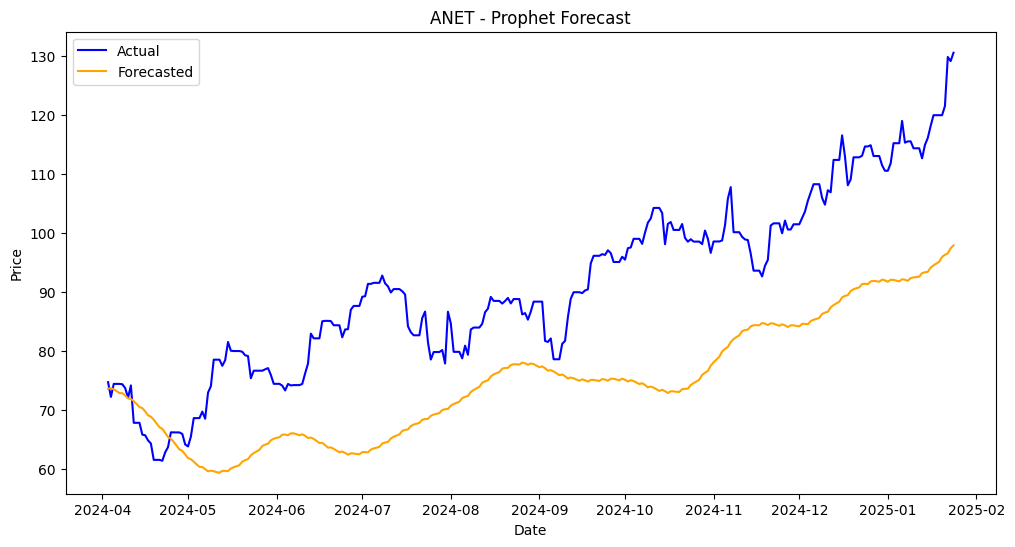

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna
import yfinance as yf

def download_data(tickers, start):
    data = pd.DataFrame()
    for ticker in tickers:
        print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data = pd.concat([data, df['Close']], axis=1)
    data.columns = tickers
    return data

# Tickers
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META",
           "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = "2021-01-01"


data_df = download_data(tickers, start_date)
data_df.index = pd.to_datetime(data_df.index)
data_df = data_df.ffill().dropna()
data_df = data_df.asfreq('D')
data_df = data_df.ffill()

data_df.index = pd.to_datetime(data_df.index)
data_df = data_df.fillna(method="ffill").dropna()
train_ratio = 0.8

# optuna
def objective(trial):
    results = []

    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])
    changepoint_prior_scale = trial.suggest_float("changepoint_prior_scale", 0.001, 0.5, log=True)
    seasonality_prior_scale = trial.suggest_float("seasonality_prior_scale", 0.01, 10, log=True)
    holidays_prior_scale = trial.suggest_float("holidays_prior_scale", 0.01, 10, log=True)

    for ticker in data_df.columns:


        df = data_df[[ticker]].reset_index()
        df.columns = ["ds", "y"]
        train_size = int(len(df) * train_ratio)
        train_data, test_data = df[:train_size], df[train_size:]

        model = Prophet(
            seasonality_mode=seasonality_mode,
            changepoint_prior_scale=changepoint_prior_scale,
            seasonality_prior_scale=seasonality_prior_scale,
            holidays_prior_scale=holidays_prior_scale
        )
        model.fit(train_data)


        future = model.make_future_dataframe(periods=len(test_data))
        forecast = model.predict(future)


        y_test = test_data["y"].values
        y_pred = forecast["yhat"][-len(test_data):].values


        mae = mean_absolute_error(y_test, y_pred)
        results.append(mae)

    return np.mean(results)


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_params)

best_params = study.best_params

for ticker in data_df.columns:
    print(f"Processing {ticker}...")


    df = data_df[[ticker]].reset_index()
    df.columns = ["ds", "y"]
    train_size = int(len(df) * train_ratio)
    train_data, test_data = df[:train_size], df[train_size:]


    model = Prophet(
        seasonality_mode=best_params["seasonality_mode"],
        changepoint_prior_scale=best_params["changepoint_prior_scale"],
        seasonality_prior_scale=best_params["seasonality_prior_scale"],
        holidays_prior_scale=best_params["holidays_prior_scale"]
    )
    model.fit(train_data)


    future = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(future)


    plt.figure(figsize=(12, 6))
    plt.plot(test_data["ds"], test_data["y"], label="Actual", color="blue")
    plt.plot(test_data["ds"], forecast["yhat"][-len(test_data):], label="Forecasted", color="orange")

    plt.title(f"{ticker} - Prophet Forecast")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
